In [1]:
#RANKING FEATURES OF A SMARTPHONES
from google.colab import files
uploaded = files.upload ()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#Loading the dataset
data_train = pd.read_csv('MobileTrain.csv')
print(data_train)



Saving MobileTrain.csv to MobileTrain.csv
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_heig

In [2]:
#Loading the dataset
uploaded = files.upload()
data_test = pd.read_csv('MobileTest.csv')
print(data_test)

Saving MobileTest.csv to MobileTest.csv
       id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1    

**Checking the dataset**

In [3]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
data_train.shape

(2000, 21)

In [6]:
data_test.shape

(1000, 21)

In [7]:
data_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [8]:
data_test.tail()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


In [9]:
data_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
data_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

**Basic detalis of dataset**

In [11]:
data_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [12]:
#Basic Information
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [14]:
# Number of unique values in each feature
data_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [15]:
# Checking for null values
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
# Descriptive Statistics
round(data_train.describe(),1).T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
blue,2000.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
dual_sim,2000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
four_g,2000.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
n_cores,2000.0,4.5,2.3,1.0,3.0,4.0,7.0,8.0


In [17]:
def understand_data(train) :

  return(pd.DataFrame({"Datatype":train.dtypes,
                       "No of null values":train.isna().sum(),
                       "No of unique values " :train.nunique(axis=0, dropna=True),
                       "unique values":train.apply(lambda x: str (x.unique()), axis=0)}))
understand_data(data_train)

,Datatype,No of null values,No of unique values,unique values
battery_power,int64,0,1094,[ 842 1021 563 ... 1139 1467 858]
blue,int64,0,2,[0 1]
clock_speed,float64,0,26,[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1. 0.9 1...
dual_sim,int64,0,2,[0 1]
fc,int64,0,20,[ 1 0 2 13 3 4 5 7 11 12 16 6 15 8 9 ...
four_g,int64,0,2,[0 1]
int_memory,int64,0,63,[ 7 53 41 10 44 22 24 9 33 17 52 46 13 23 49 ...
m_dep,float64,0,10,[0.6 0.7 0.9 0.8 0.1 0.5 1. 0.3 0.4 0.2]
mobile_wt,int64,0,121,[188 136 145 131 141 164 139 187 174 93 182 1...
n_cores,int64,0,8,[2 3 5 6 1 8 4 7]


**PRE PROCESSING**

In [18]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [19]:
data = pd.concat([data_train.assign(ind="train"), data_test.assign(ind="test")])

In [20]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ind,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,2549,9,7,19,0,0,1,1.0,train,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,2631,17,3,7,1,1,0,2.0,train,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2603,11,2,9,1,1,0,2.0,train,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,2769,16,8,11,1,0,0,2.0,train,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1411,8,2,15,1,1,0,1.0,train,NaN


In [21]:
data_train.shape

(2000, 21)

In [22]:
data_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

**DATA PREPROCESSING**

**MISSING VALUES**

In [23]:
print(data.isnull().sum())

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
ind                 0
id               2000
dtype: int64


In [24]:
#percentage of missing values in price_range and id are

print('% of missing values in id in the dataset is :', round(data['id'].isna().sum()/len(data)*100,2), '%')
print('% of missing values in price_range in the dataset is :', round(data['price_range'].isna().sum()/len(data)*100,2), '%')

% of missing values in id in the dataset is : 66.67 %
% of missing values in price_range in the dataset is : 33.33 %


In [25]:
data.drop(['id'],axis=1,inplace=True)

In [26]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ind
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,train
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,train
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,train
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,train
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,train


In [27]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'ind'],
      dtype='object')

Though price range has 33.3% missing values,we cannot handle that because it is our target and it happened due to the merging of datasets. Hence we will leave that column as it is.

In [28]:
#Classifying columns into continuous and discrete
def classify_columns(train):
    continuous_columns = []
    discrete_columns = []

    for column in train.columns:
        if  train[column].dtype in [int,float]:
            # check if the feature is continuous or discrete
            if train [column].nunique() / len(train[column]) > 0.05:
               continuous_columns.append(column)
            else:
                discrete_columns.append(column) 

    return continuous_columns, discrete_columns
classify_columns(data_train)



(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'],
 ['blue',
  'clock_speed',
  'dual_sim',
  'fc',
  'four_g',
  'int_memory',
  'm_dep',
  'n_cores',
  'pc',
  'sc_h',
  'sc_w',
  'talk_time',
  'three_g',
  'touch_screen',
  'wifi',
  'price_range'])

**Exploratory Data Analysis**

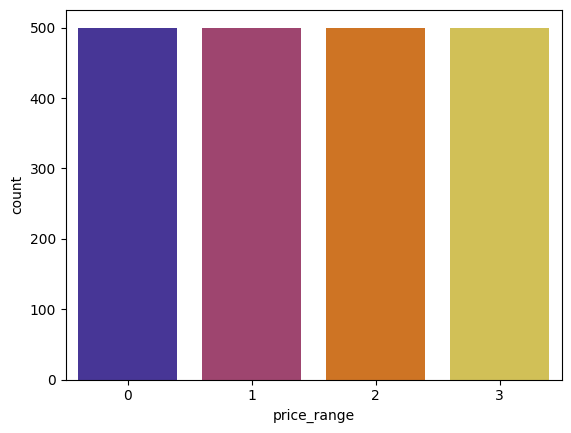

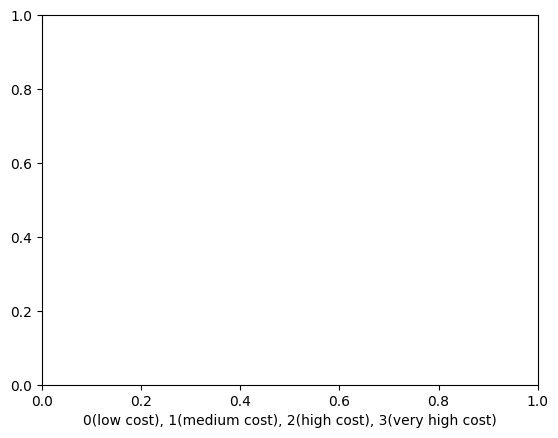

In [29]:
#count the plot for price range
sns.countplot( x="price_range", data=data_train, palette='CMRmap')
plt.title=("price_range")
plt.show()
plt.xlabel('0(low cost), 1(medium cost), 2(high cost), 3(very high cost)')
plt.show()



*   The dataset is balanced




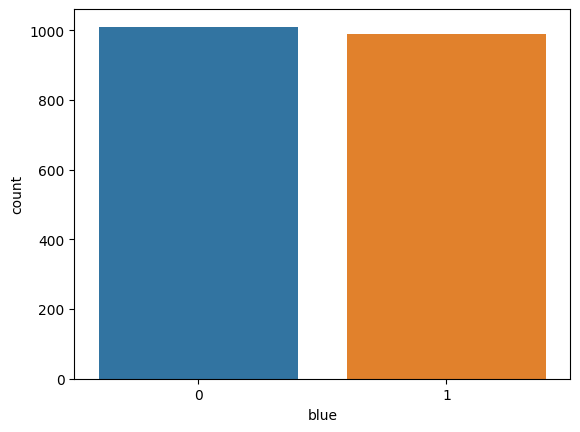

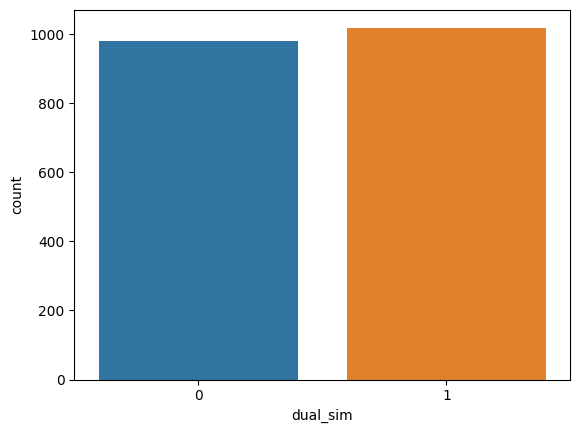

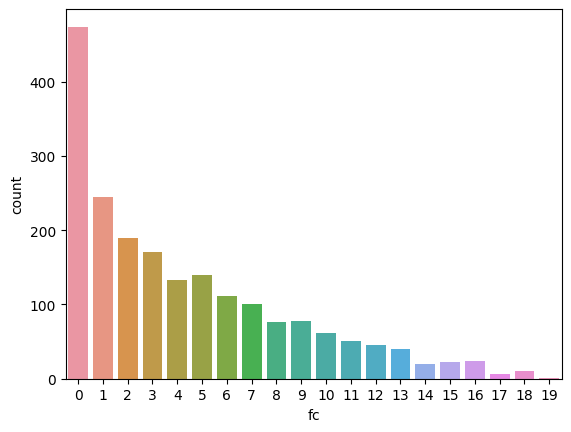

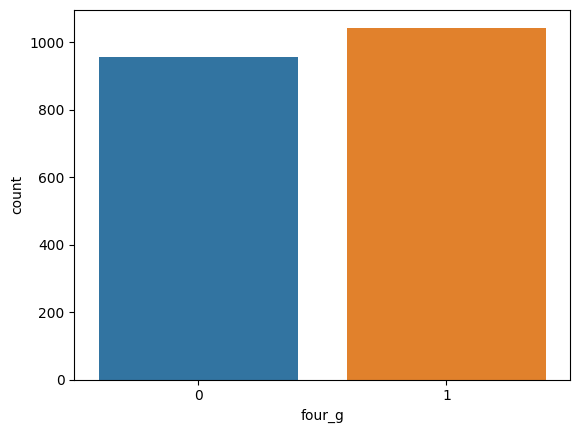

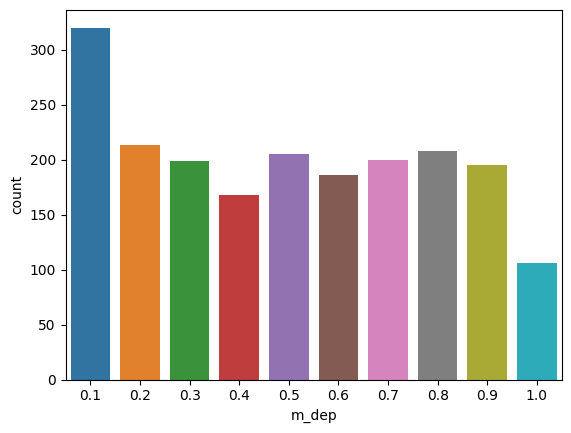

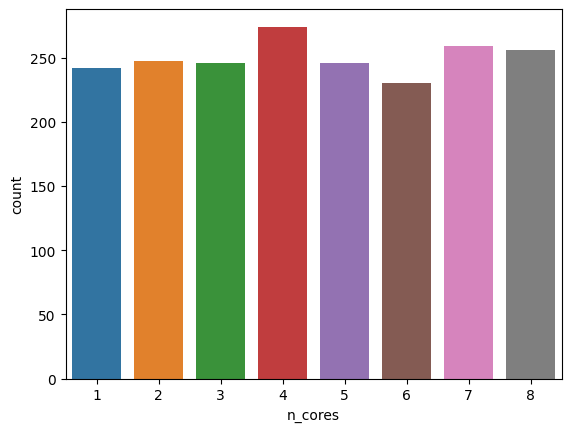

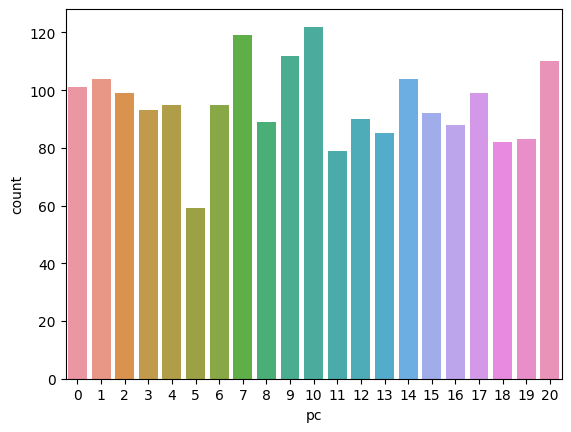

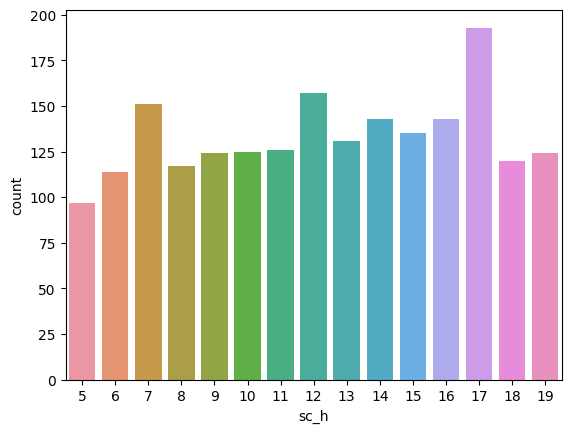

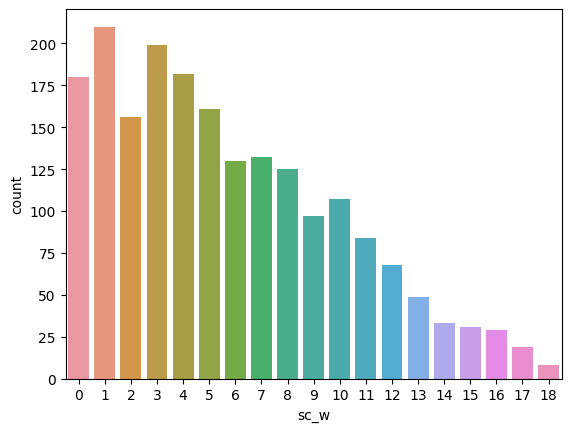

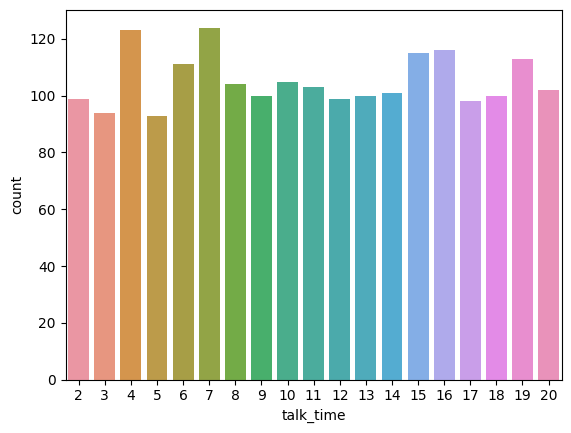

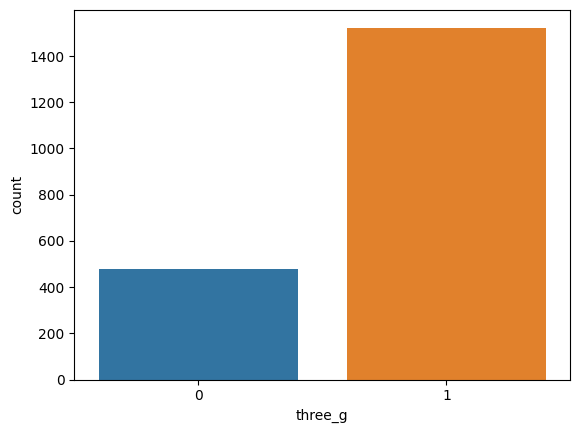

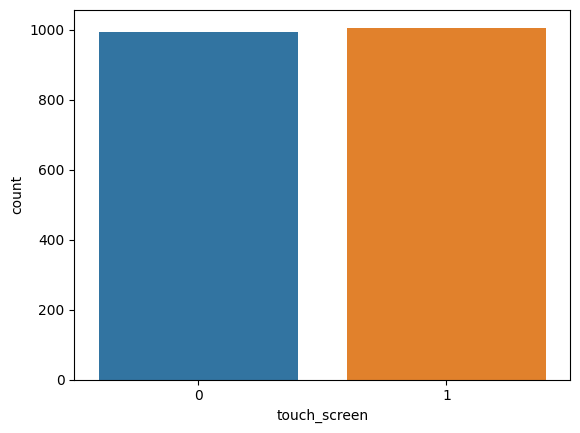

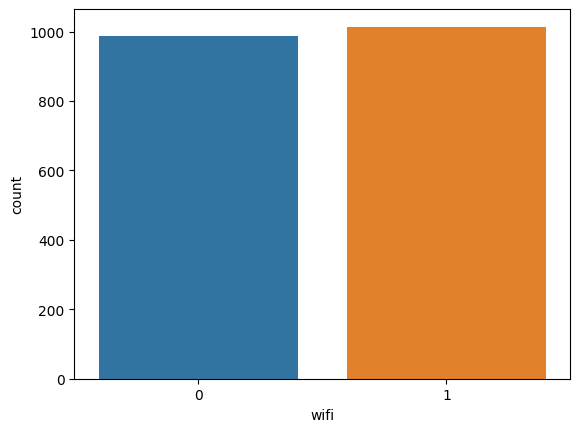

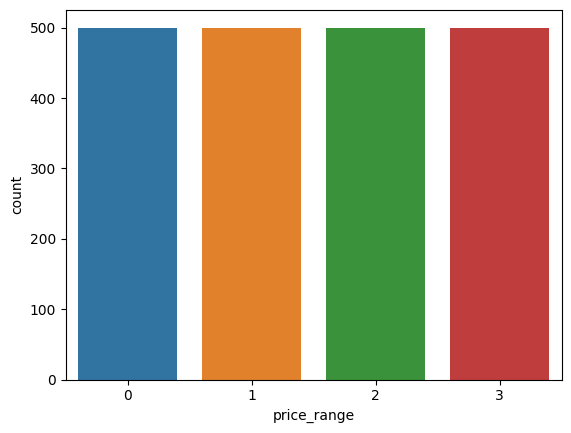

In [31]:
#countplot for various columns
for i in data_train:
  if(data_train[i].nunique())<=25:
    sns.countplot(x=data_train[i])
    plt.show()



* majority of smartphones we can use dual sim.
* majority of phones  have front camera. only quarter of the phone doesn't have front camera.
* talk time has higly speed.
*   most of the phones are touch csreen.
*   wifi has higly speed.
*   price range are equal










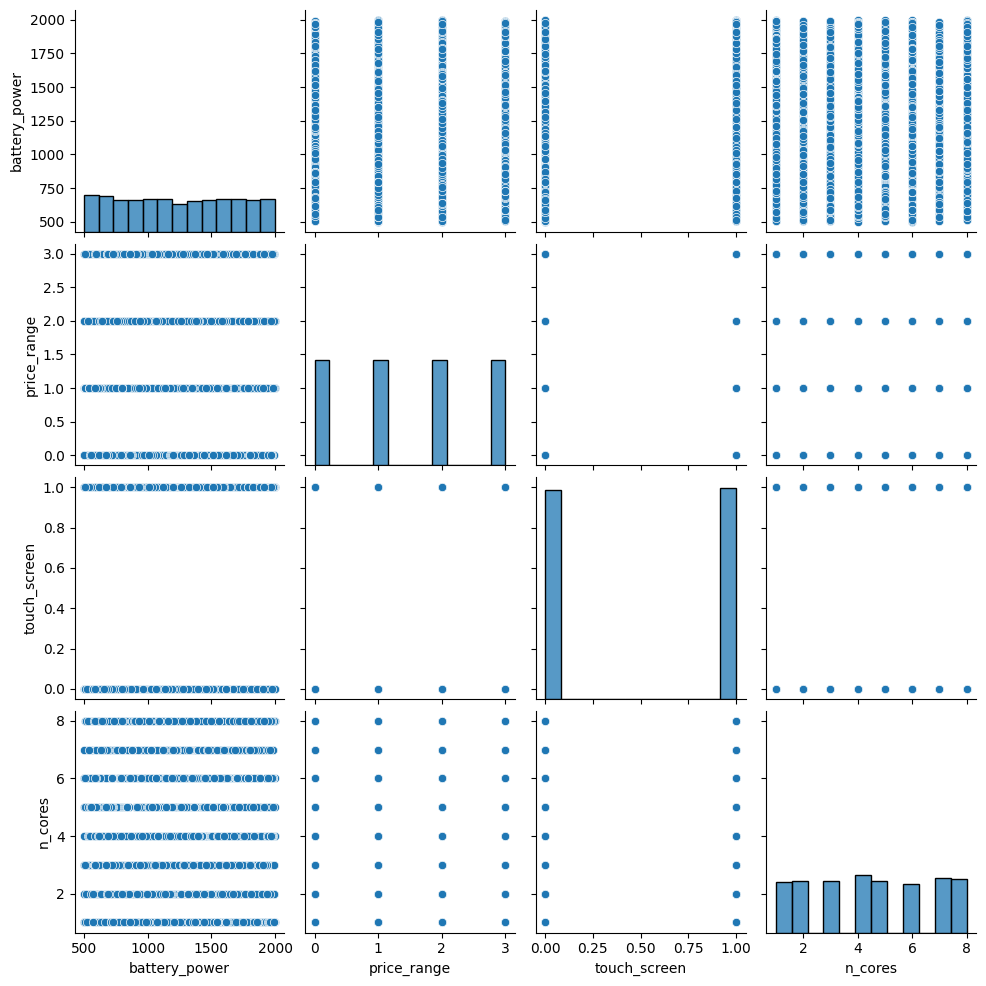

In [32]:
#count the values of battery_power, price_range,touch_screen,n_cores
slicedata=data_train[['battery_power','price_range','touch_screen','n_cores']]
sns.pairplot(slicedata)

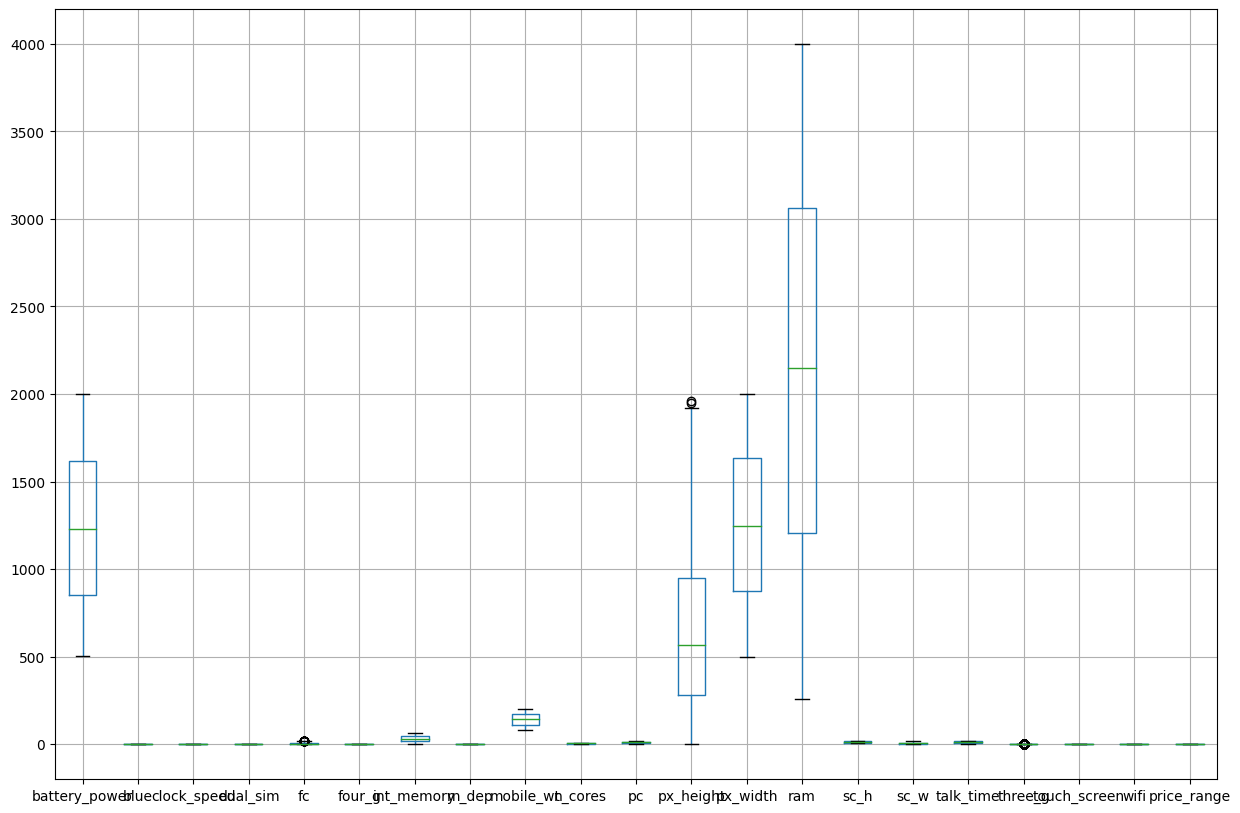

In [33]:
data_train.boxplot(figsize=(15,10))
plt.show()

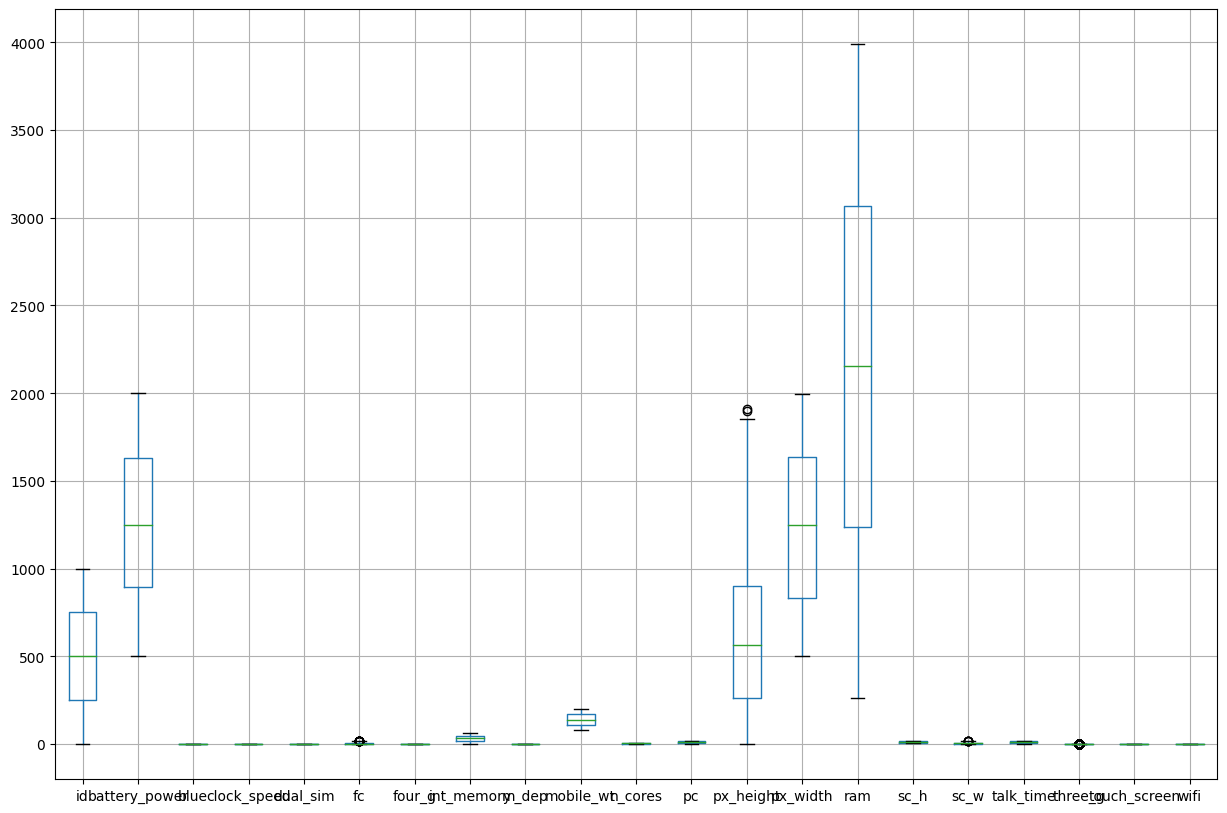

In [34]:
data_test.boxplot(figsize=(15,10))
plt.show()

<Axes: ylabel='count'>

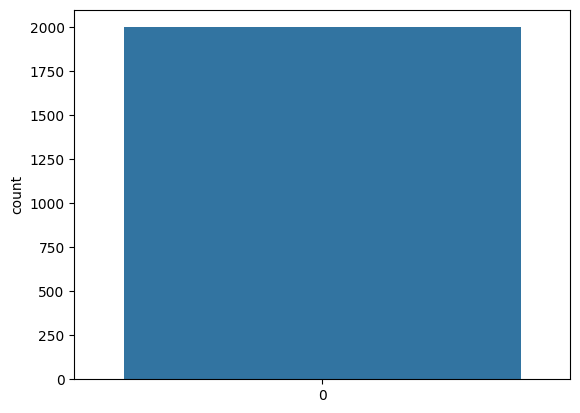

In [35]:
sns.countplot(data_train['dual_sim'])

<Axes: ylabel='count'>

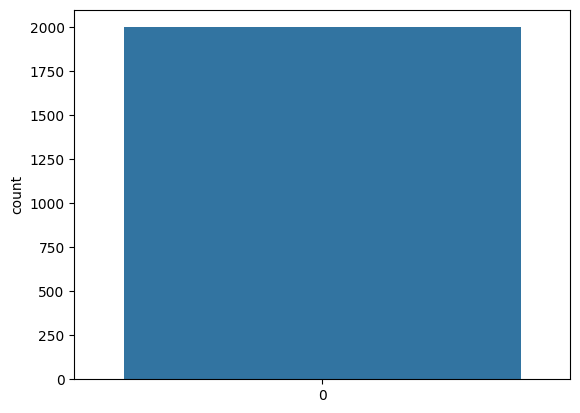

In [36]:
sns.countplot(data_train['three_g'])

<Axes: ylabel='count'>

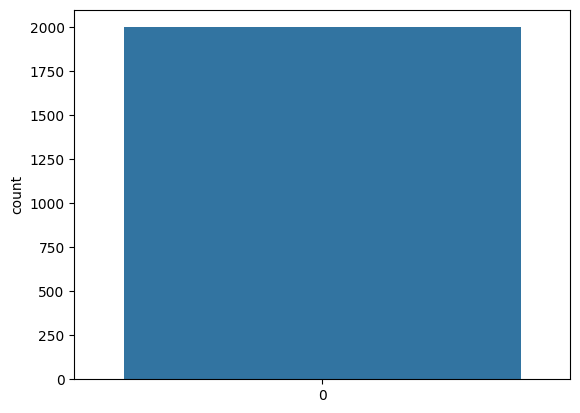

In [37]:
sns.countplot(data_train['four_g'])

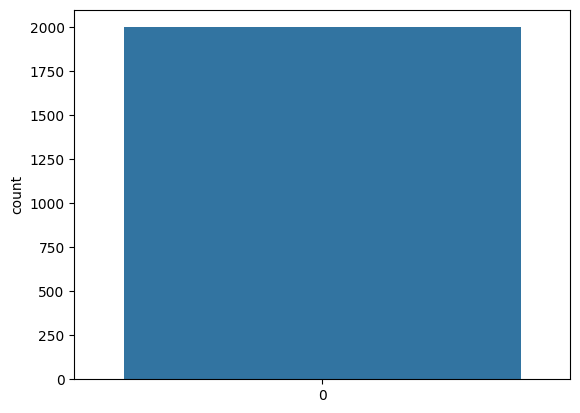

In [38]:
sns.countplot(data_train['talk_time'])
plt.show()

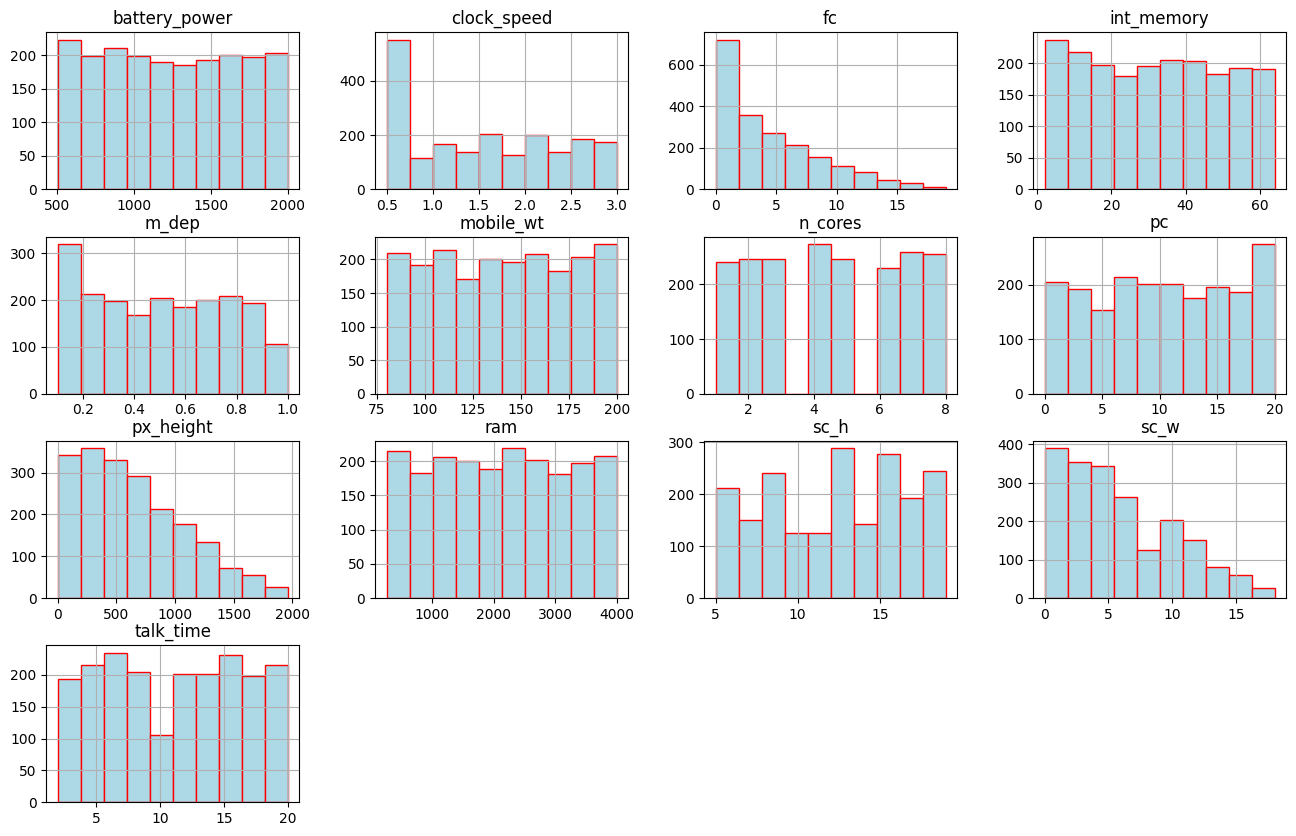

In [39]:
#plotting histogram to understand more about numerical features
num_col = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'ram', 'sc_h', 'sc_w', 'talk_time']
data_train.hist(num_col,figsize=(16,10), color = "lightblue", ec="red")
plt.show()

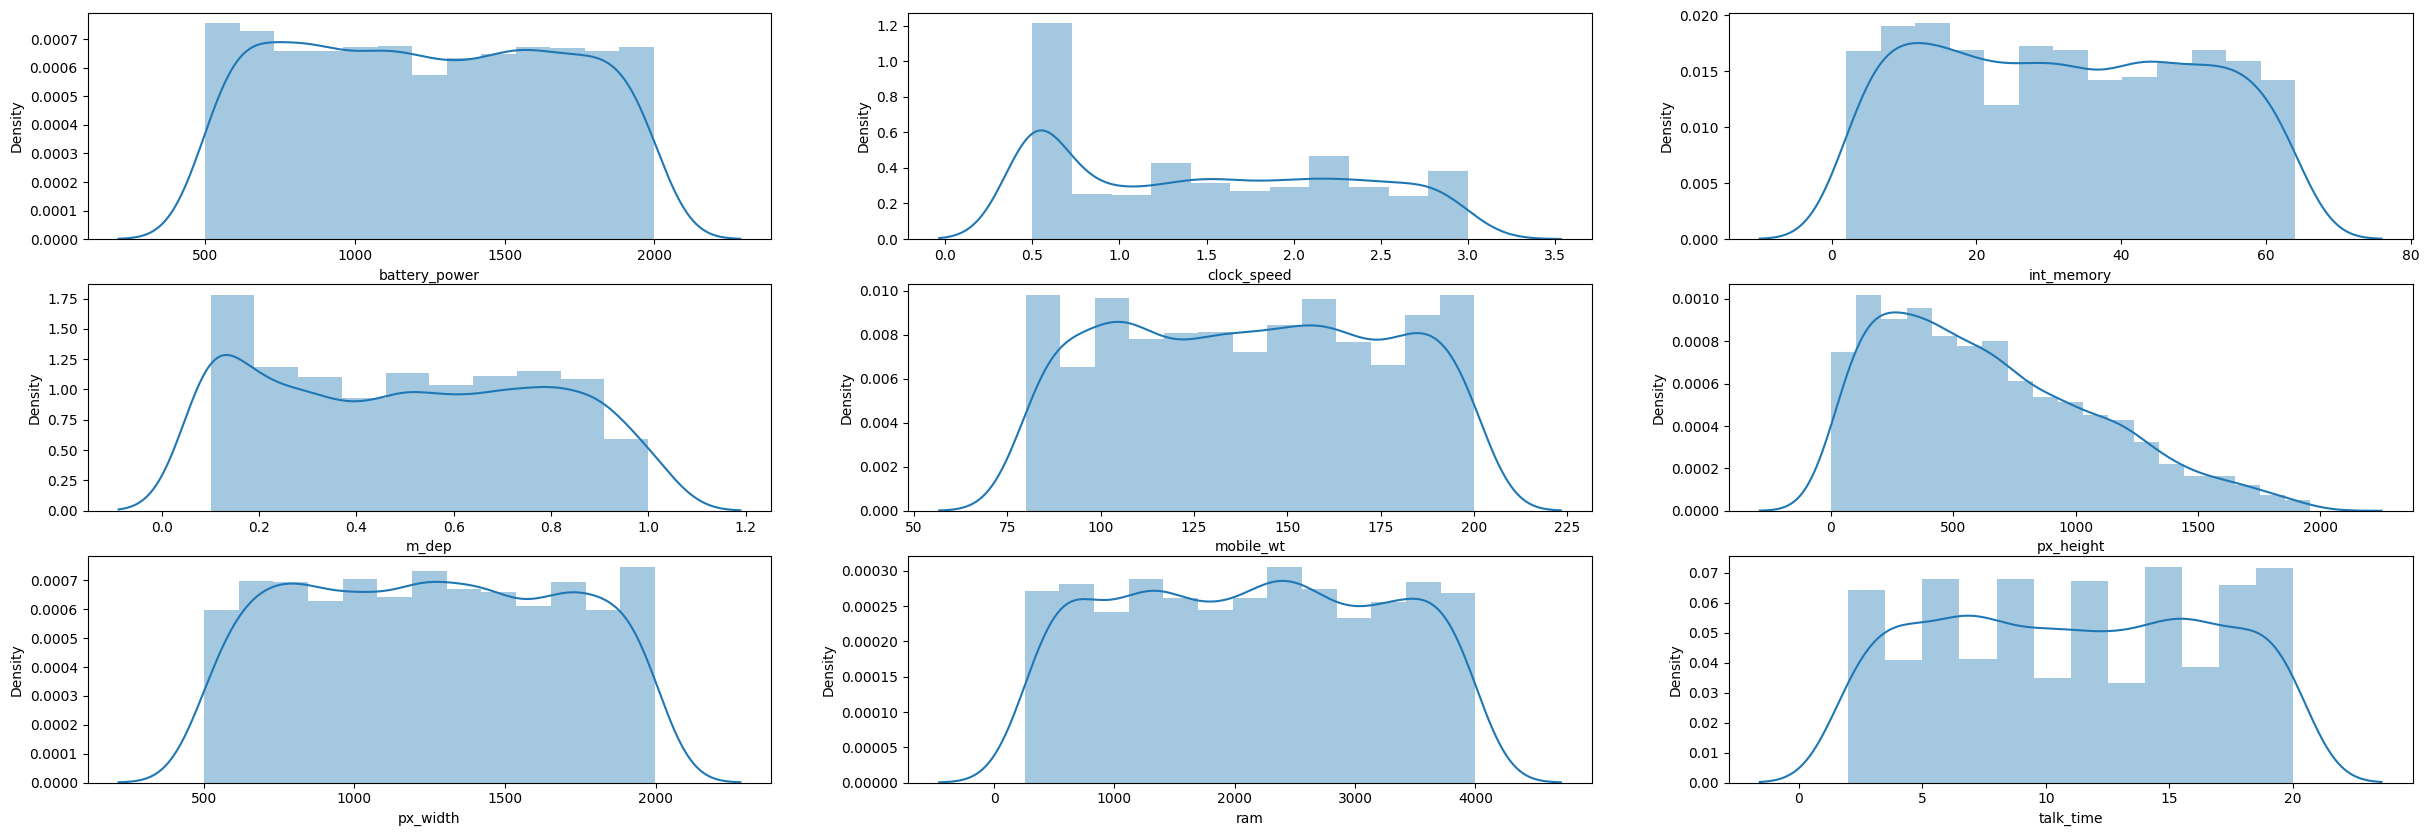

In [40]:
#Distplot for various columns

plt.figure(figsize = (30,10))
plt.subplot(331)
sns.distplot(data_train['battery_power'])

plt.subplot(332)
sns.distplot(data_train['clock_speed'])

plt.subplot(333)
sns.distplot(data_train['int_memory'])

plt.subplot(334)
sns.distplot(data_train['m_dep'])

plt.subplot(335)
sns.distplot(data_train['mobile_wt'])

plt.subplot(336)
sns.distplot(data_train['px_height'])
             
plt.subplot(337)
sns.distplot(data_train['px_width'])

plt.subplot(338)
sns.distplot(data_train['ram'])

plt.subplot(339)
sns.distplot(data_train['talk_time'])
plt.show()

Distribution of  battery_power with respect to price range 


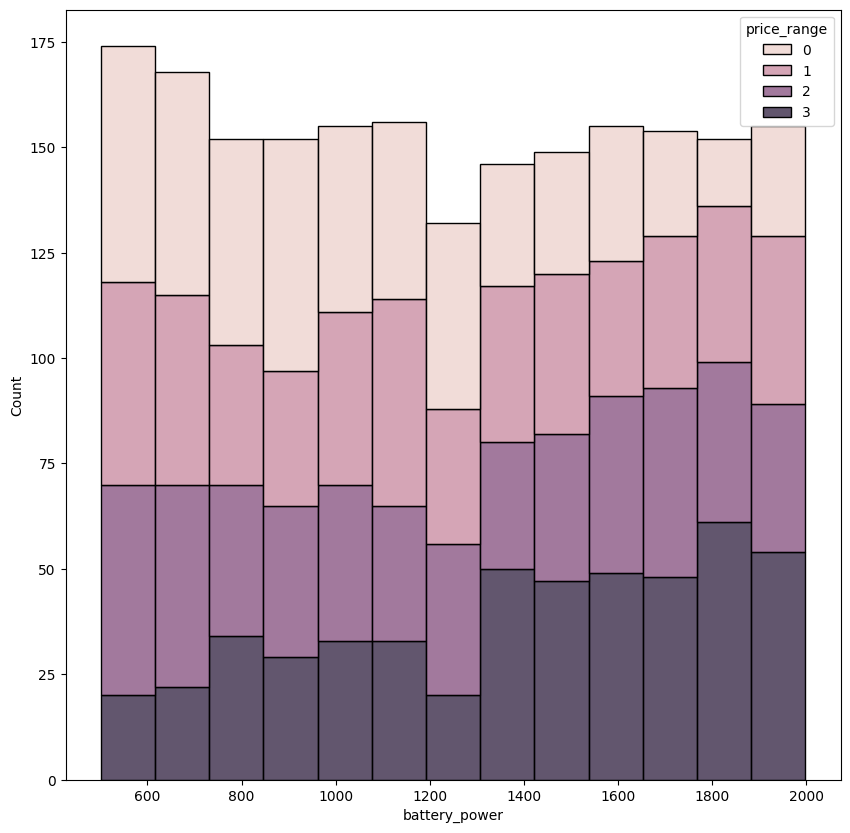

Distribution of  blue with respect to price range 


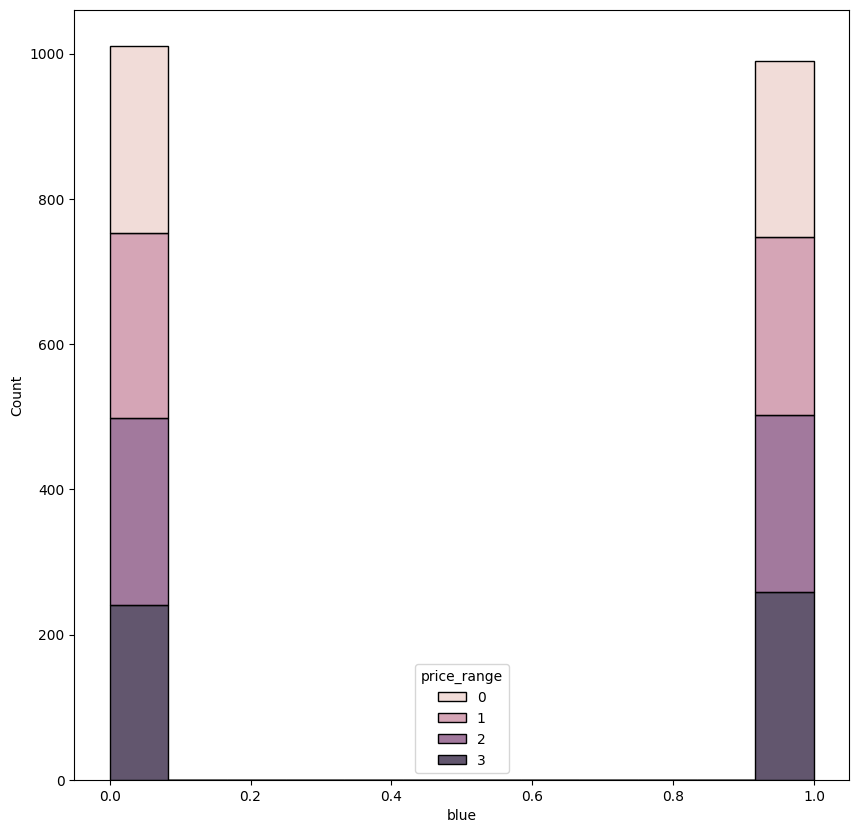

Distribution of  clock_speed with respect to price range 


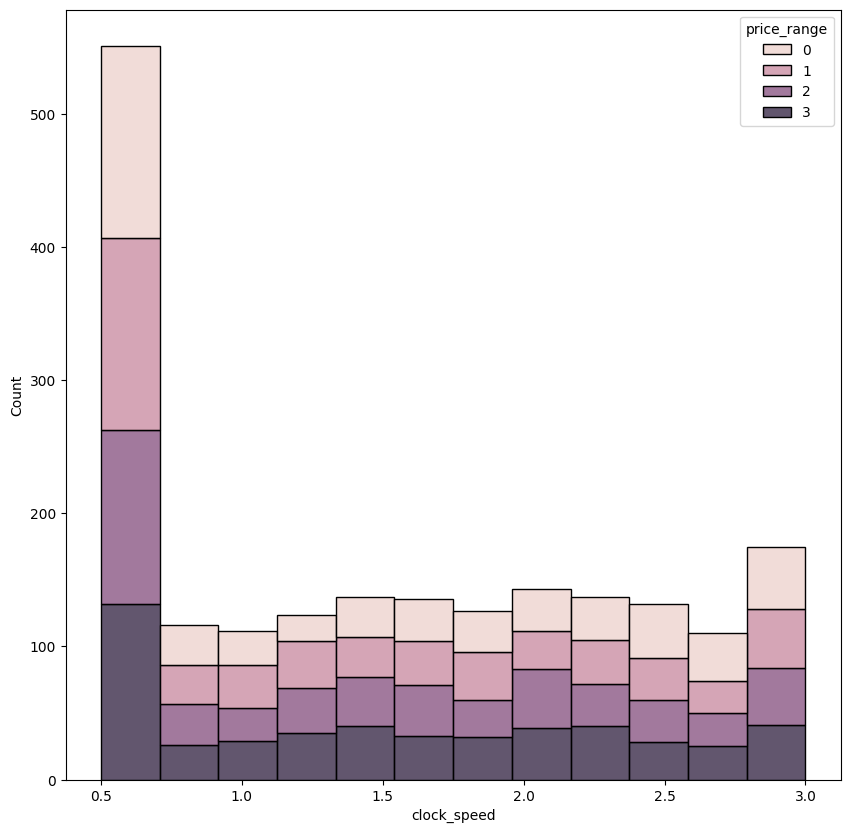

Distribution of  dual_sim with respect to price range 


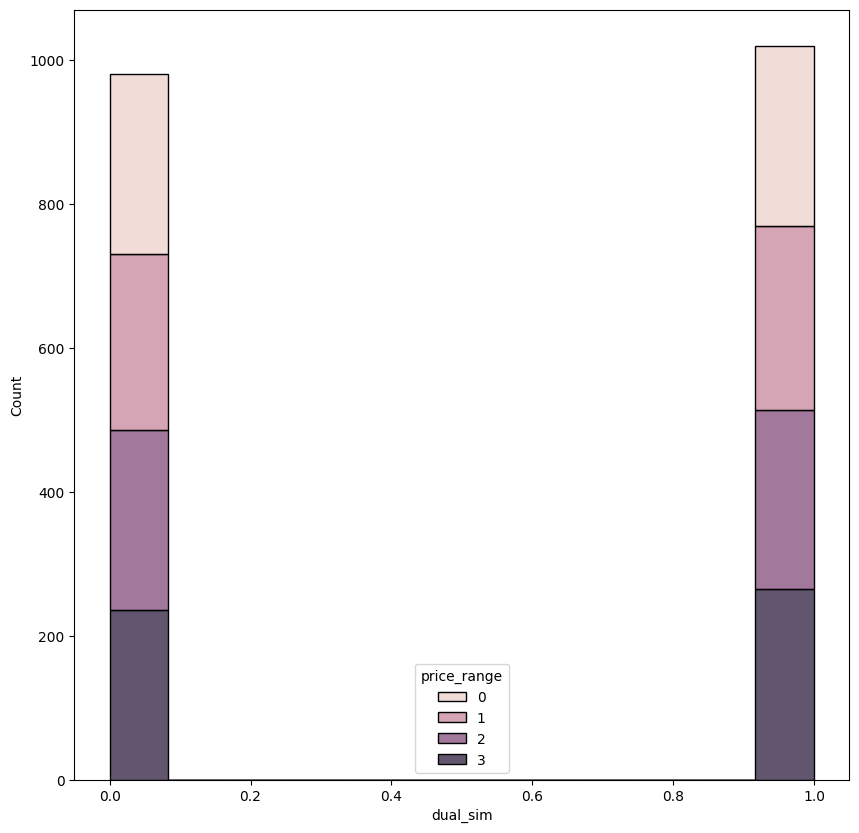

Distribution of  fc with respect to price range 


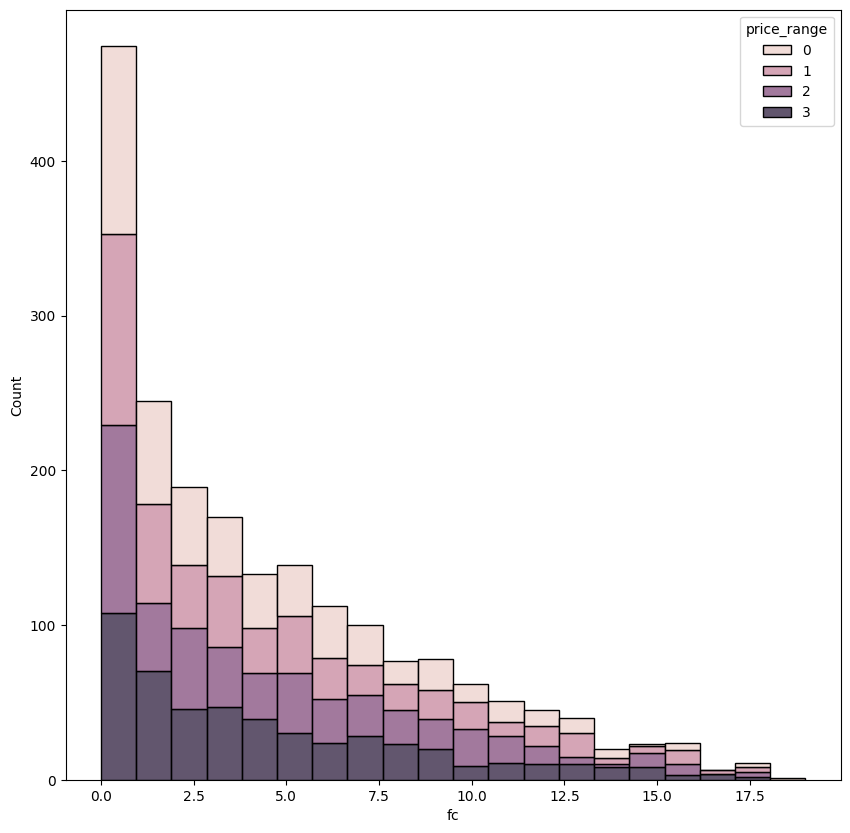

Distribution of  four_g with respect to price range 


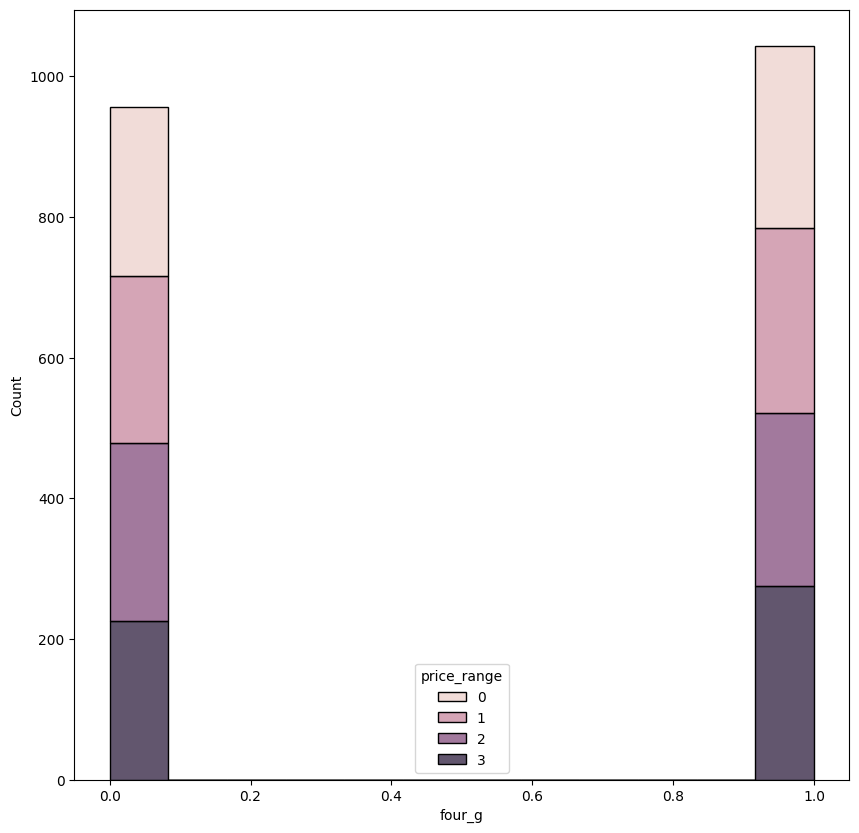

Distribution of  int_memory with respect to price range 


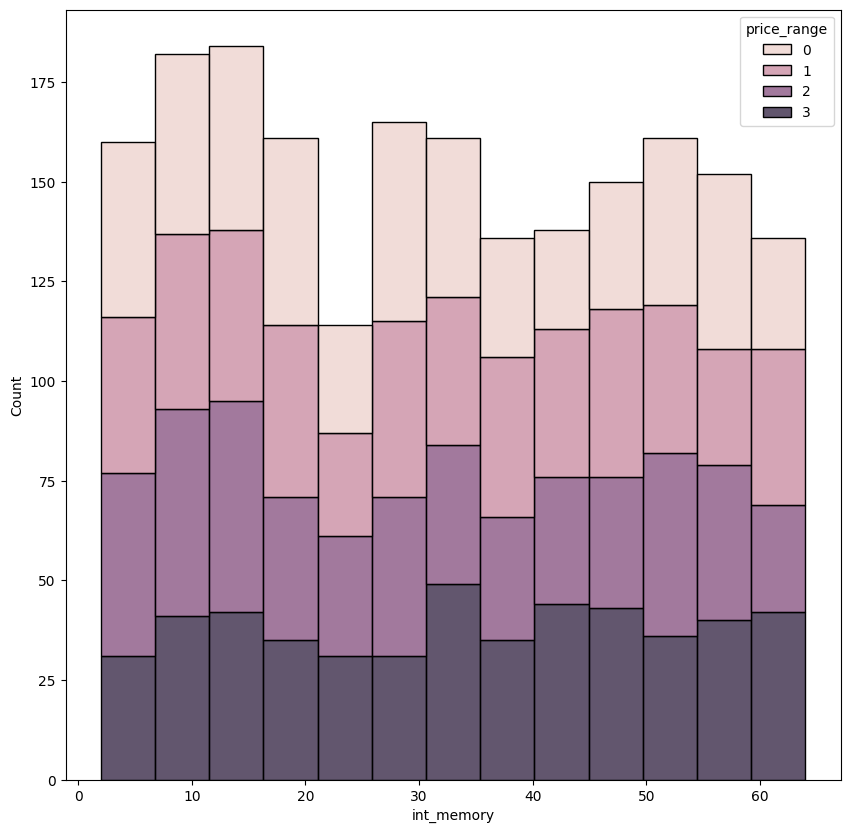

Distribution of  m_dep with respect to price range 


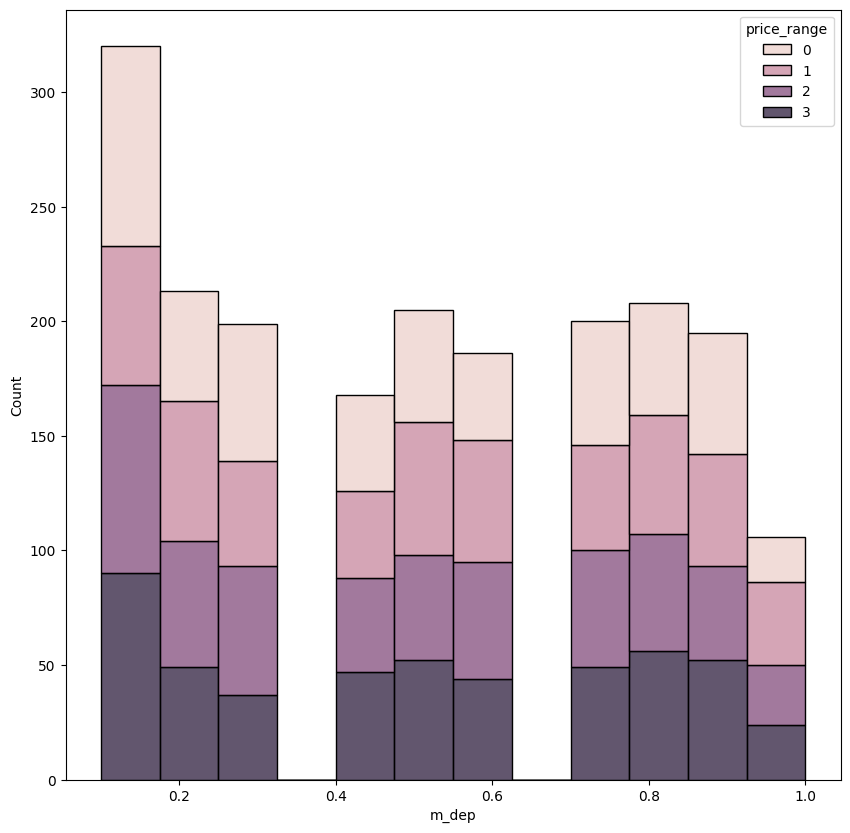

Distribution of  mobile_wt with respect to price range 


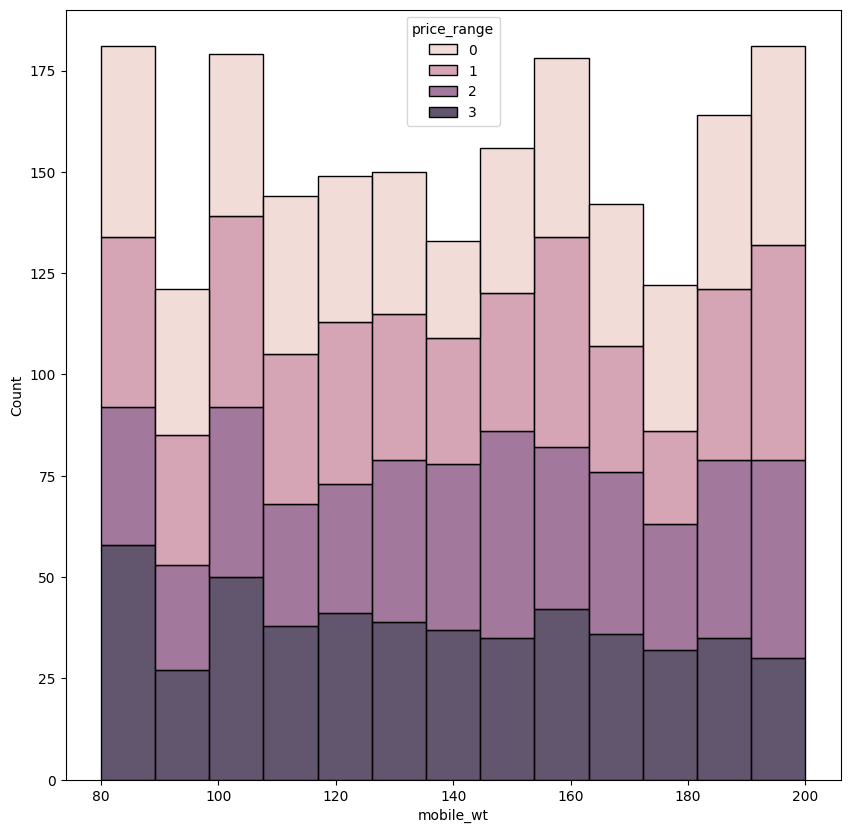

Distribution of  n_cores with respect to price range 


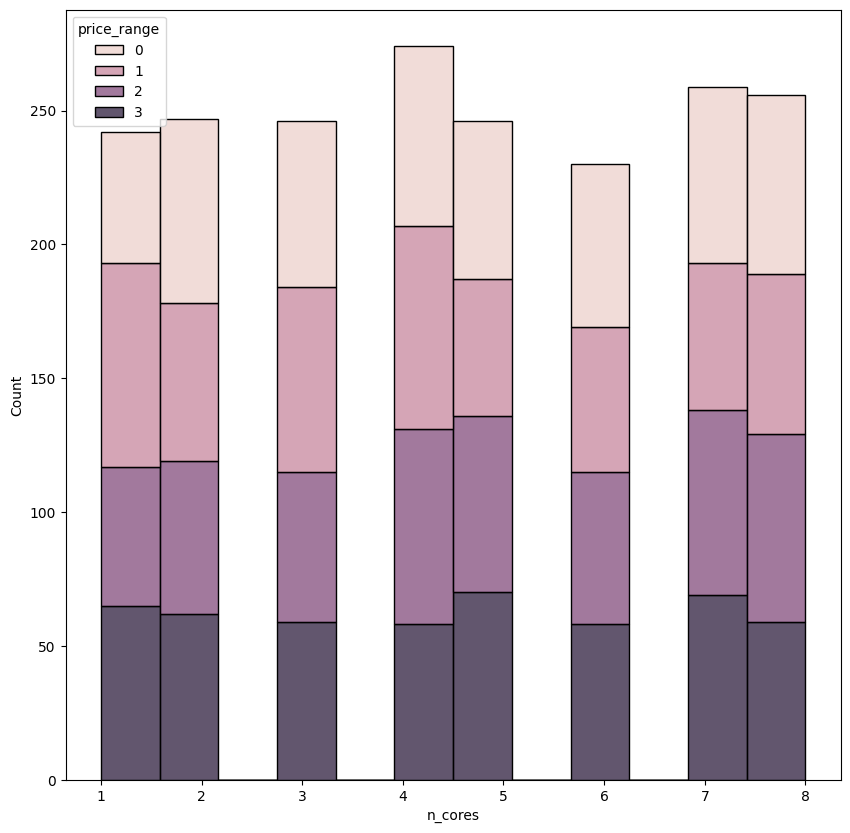

Distribution of  pc with respect to price range 


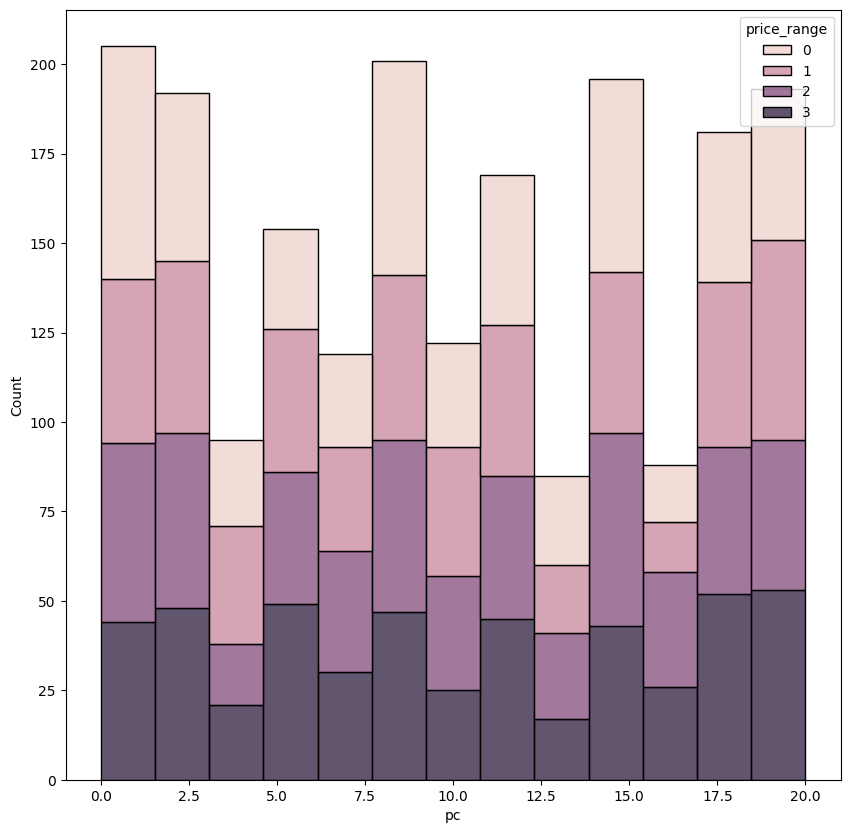

Distribution of  px_height with respect to price range 


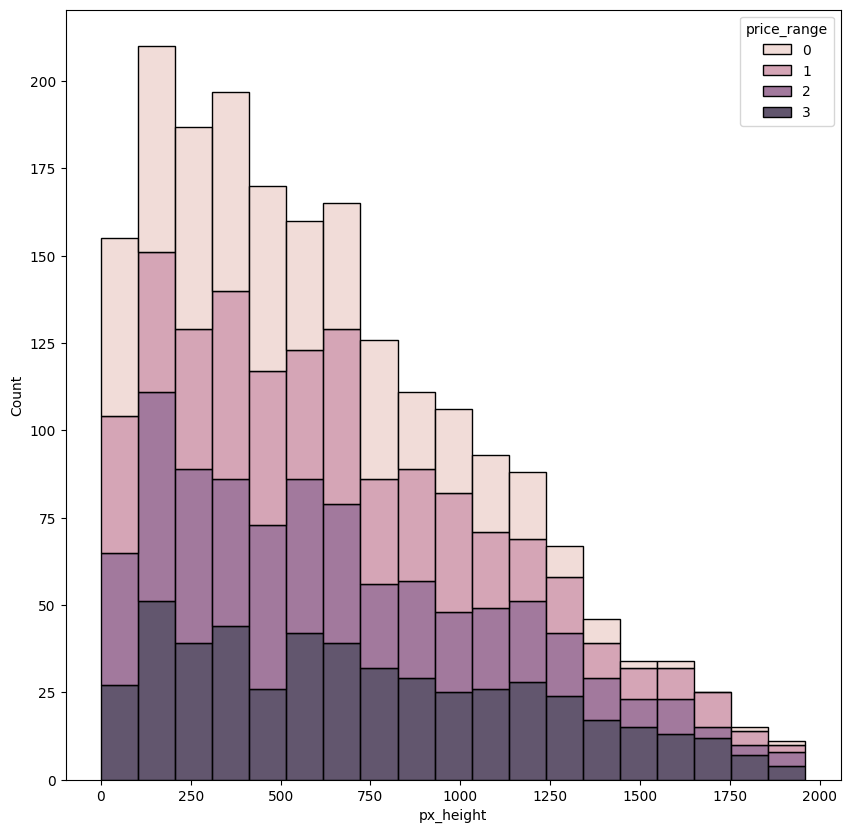

Distribution of  px_width with respect to price range 


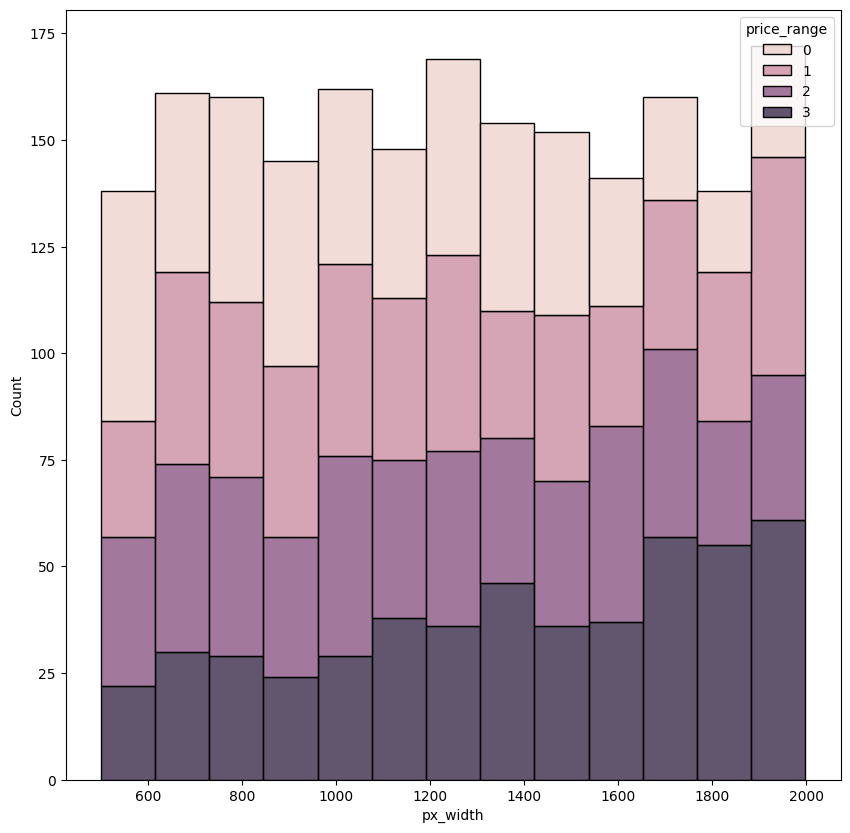

Distribution of  ram with respect to price range 


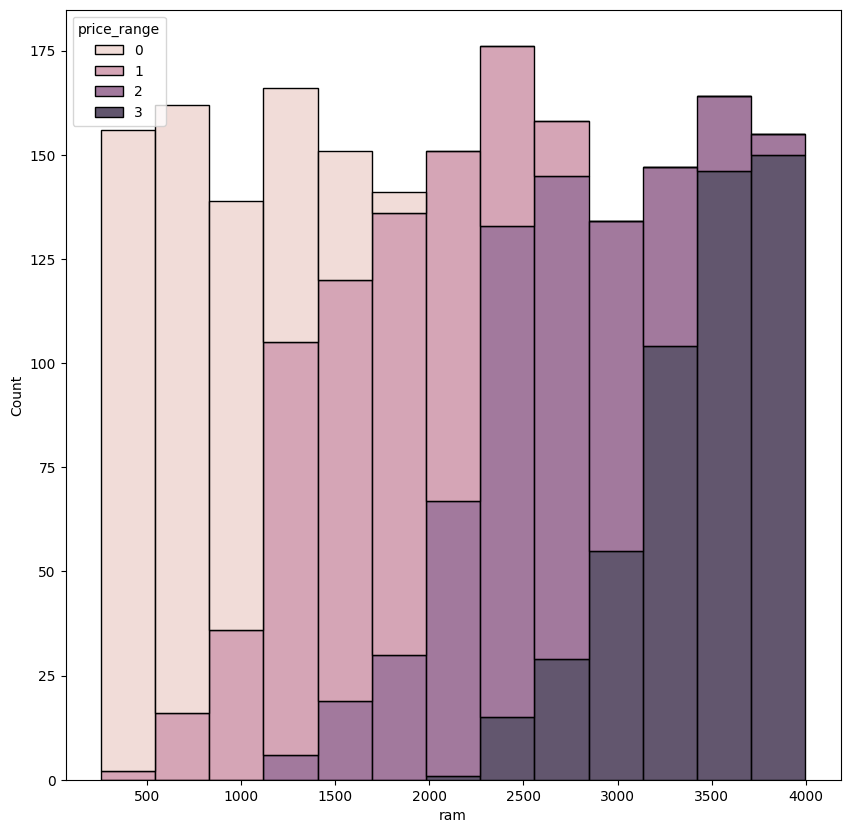

Distribution of  sc_h with respect to price range 


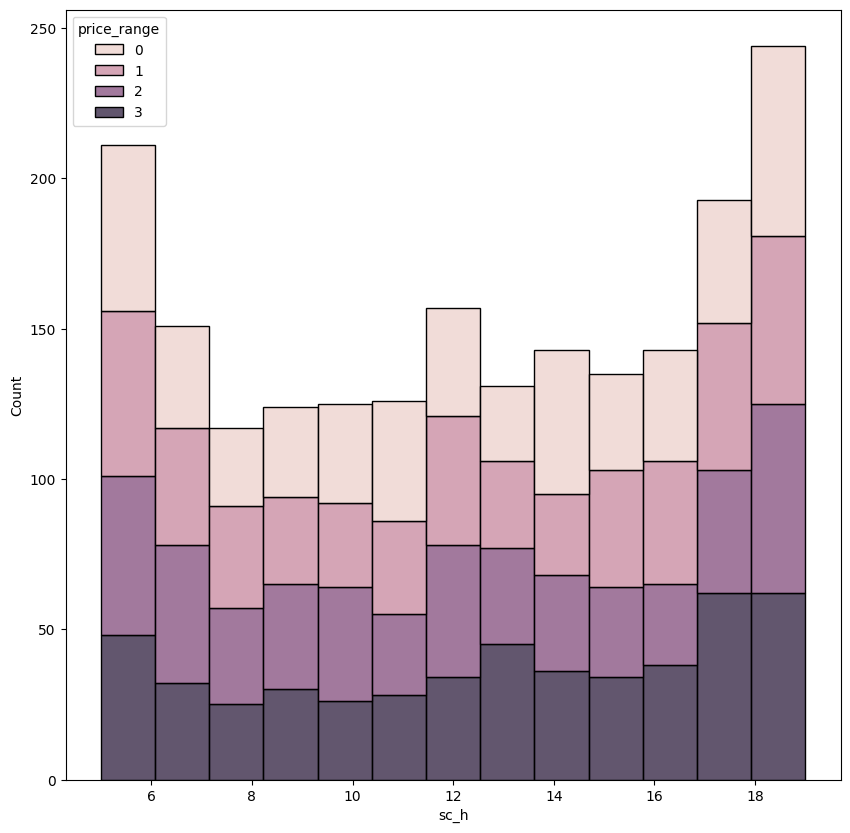

Distribution of  sc_w with respect to price range 


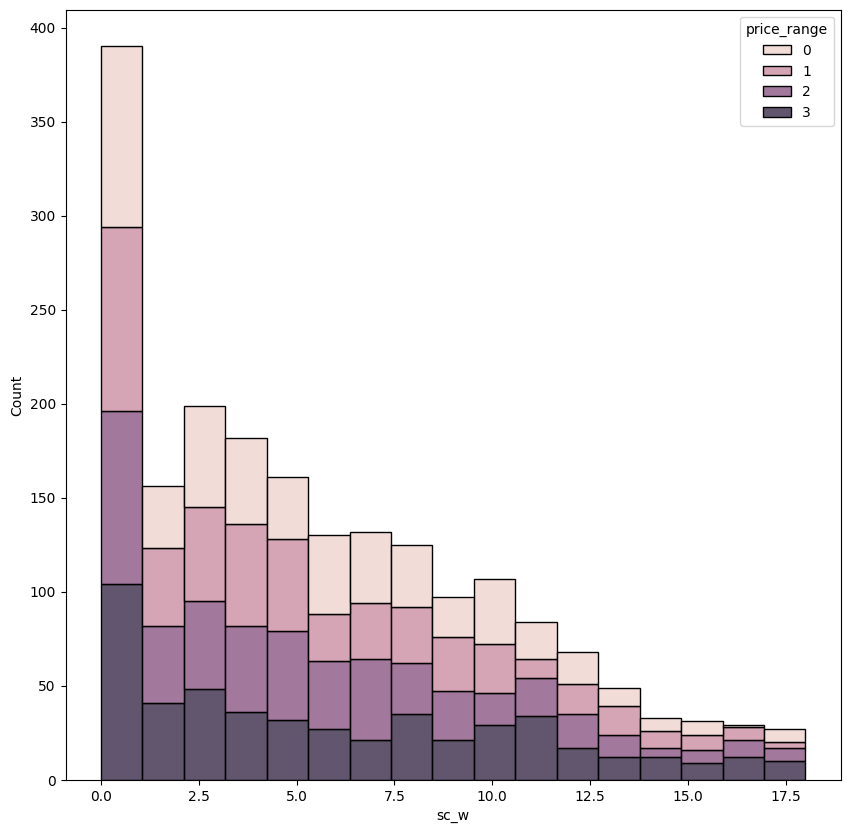

Distribution of  talk_time with respect to price range 


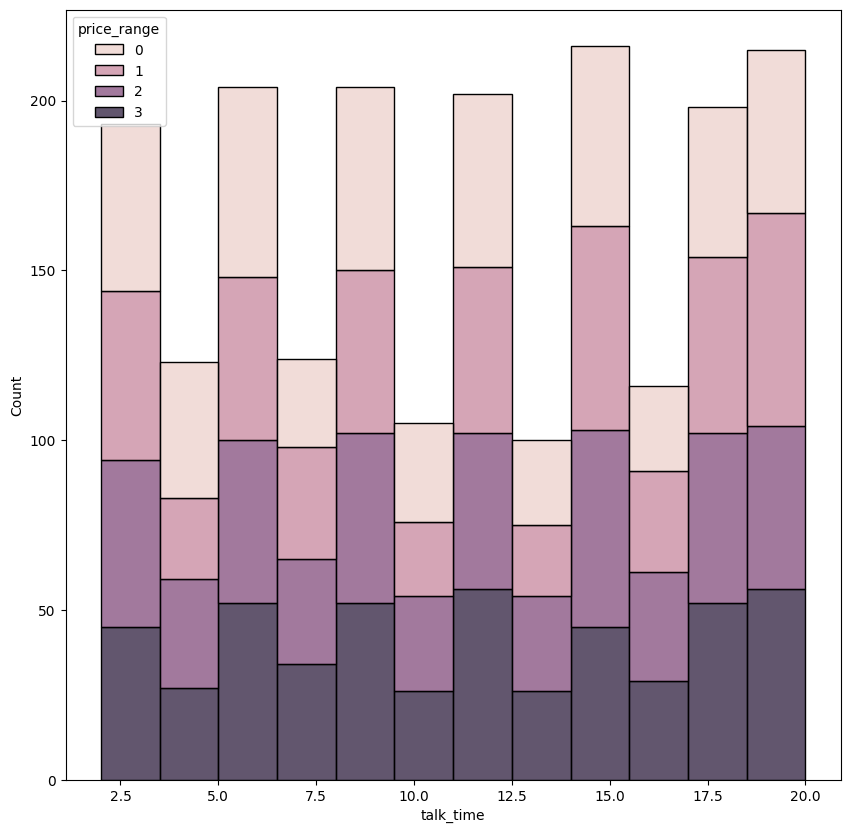

Distribution of  three_g with respect to price range 


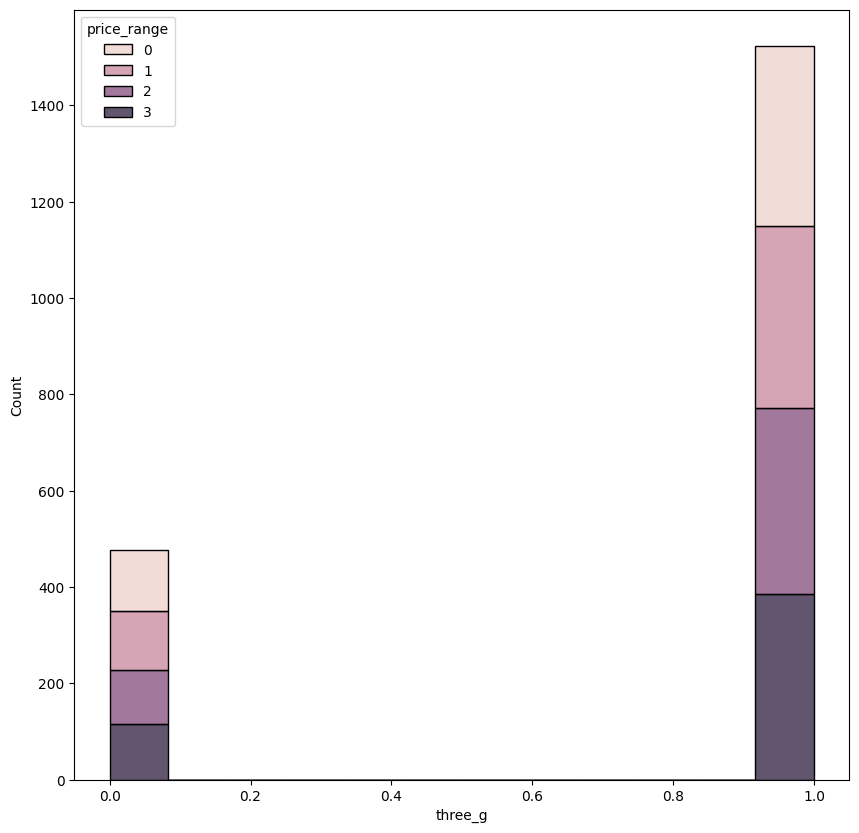

Distribution of  touch_screen with respect to price range 


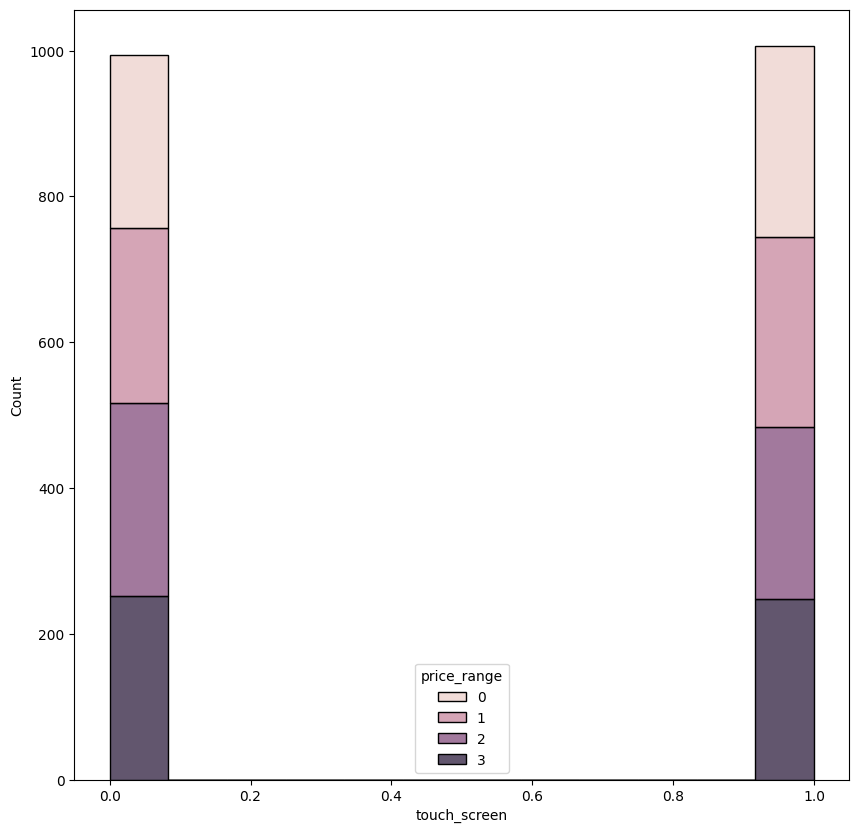

Distribution of  wifi with respect to price range 


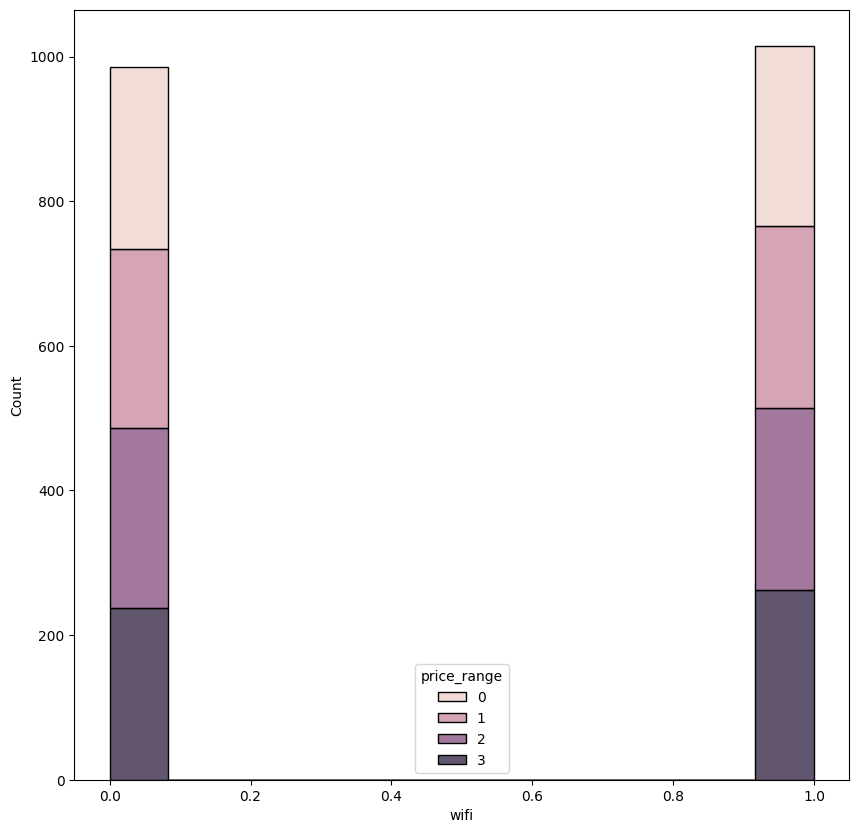

In [41]:
#Analsis with respect to target variable "price_range"

for i in data_train.columns[:-1]:
    plt.figure(figsize=(10,10))
    sns.histplot(x=data_train[i], hue=data_train["price_range"], multiple="stack")
    print("Distribution of ",i,"with respect to price range ")
    plt.show()

**CORRELATION**

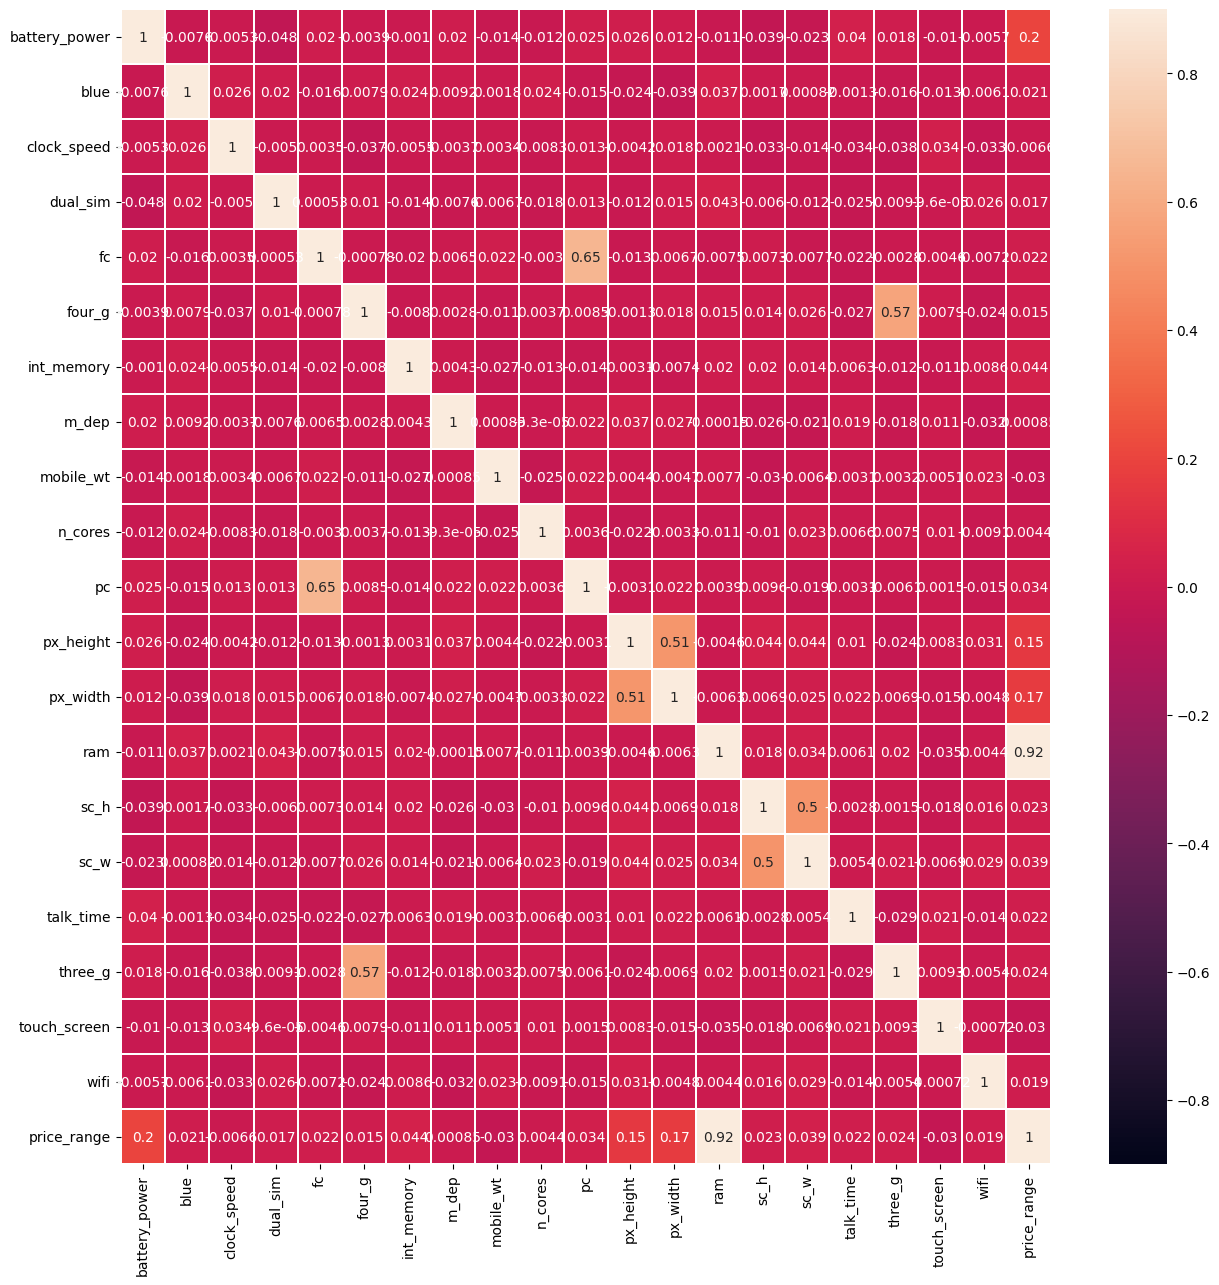

In [42]:
cor=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True, vmin=-.9, vmax=.9, linewidths=.2,linecolor='white')
plt.show()

In [43]:
def correlation(data, threshold):
    col_corr = set() # set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
               colname = corr_matrix.columns[i]
               col_corr.add(colname)

    return col_corr           

In [44]:
corr_features = correlation(data_train, 0.85)
len(set(corr_features))

1

In [45]:
corr_features

{'price_range'}

In [46]:
data_train[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
            'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
            'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 
            'touch_screen', 'wifi', 'price_range']].nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [47]:
data_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

**PIE CHART BASED ON PERCENTAGES**

In [48]:
data_train['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

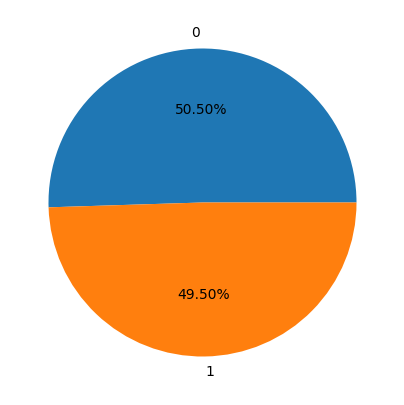

In [49]:
#Bluetooth devics

count=data_train["blue"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.show()

In [50]:
data_train['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

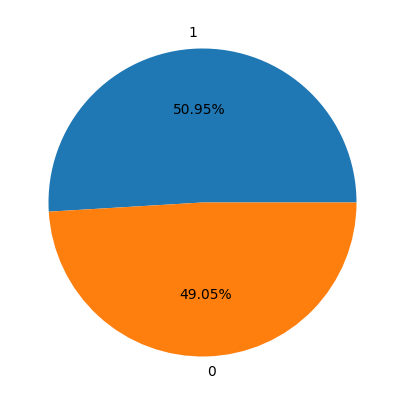

In [51]:
#dual sim

count=data_train["dual_sim"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.show()

In [52]:
data_train['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

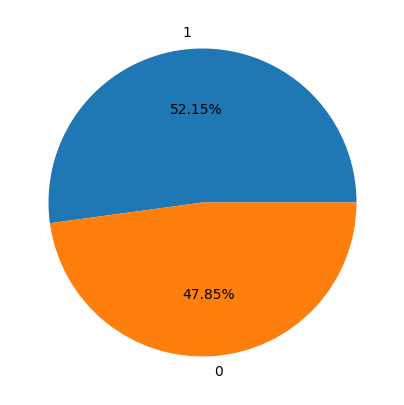

In [53]:
#4G
count=data_train["four_g"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.show()

In [54]:
data_train['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

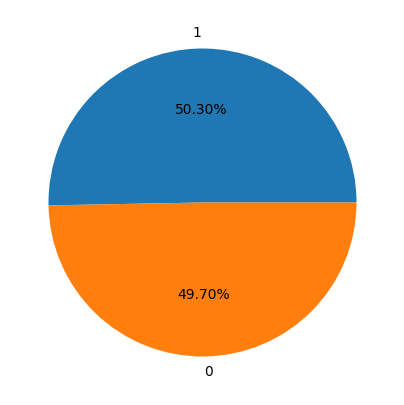

In [55]:
#Touch screen
count=data_train["touch_screen"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.show()

In [56]:
data_train["wifi"].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

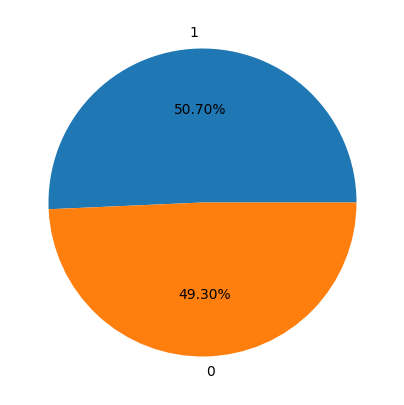

In [57]:
#wifi
count=data_train["wifi"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.show()

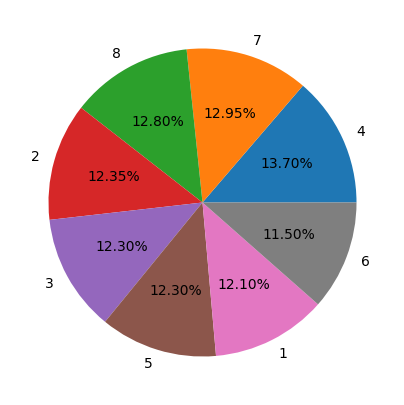

In [58]:
#processors
count=data_train["n_cores"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.show()

Smartphones with Quad core are the most sought after.

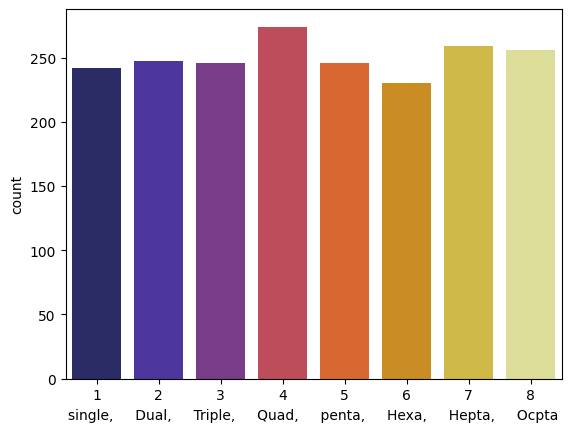

In [59]:
sns.countplot(x='n_cores', data=data_train, palette='CMRmap')
plt.xlabel('single,     Dual,     Triple,     Quad,     penta,     Hexa,     Hepta,     Ocpta')
plt.show()



*  We can see almost half of the phones have bluetooth,dualsim, 4G, touchscreen and wifi.
*  Almost three-fourth of the phones have 3G.
*  The different types of cores are also spread out almost evenly.






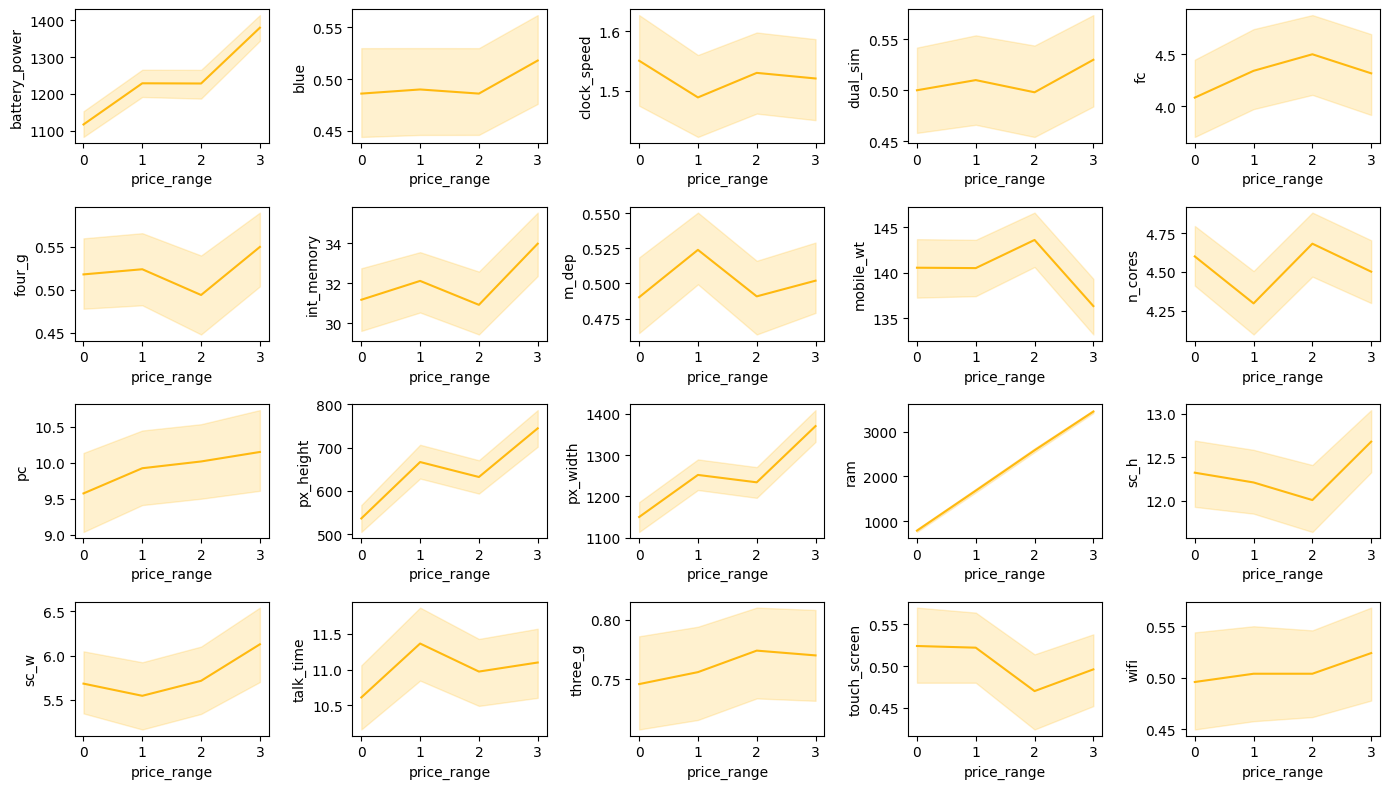

In [60]:
#Line plot for all columns
p=data_train.drop('price_range',axis=1)
plt.figure(figsize=(14,8))
for i,j in enumerate(p):
    plt.subplot(4,5, i+1)
    sns.lineplot(y=data_train[j],x=data_train["price_range"],color="#FFB90F")
plt.tight_layout()



*  The higher the price range higher the average ram size.
*  We can see the higher the price range it tend to have a higher battery power except on the price range 1 to 2. it seems that from price range 1 to 2 there's no significance difference in the average battery power.
* clock speed highest for mobiles in lower price range. 
*  The price range of 0 has more products with lower pixel width and pixel height while the highest price range has more products with higher pixel width and pixel height.
*  it seems that talk time doesn't really affect the price range.
*  Higher price range has a higher megapixel primary camera.







**Bivariate Analysis**

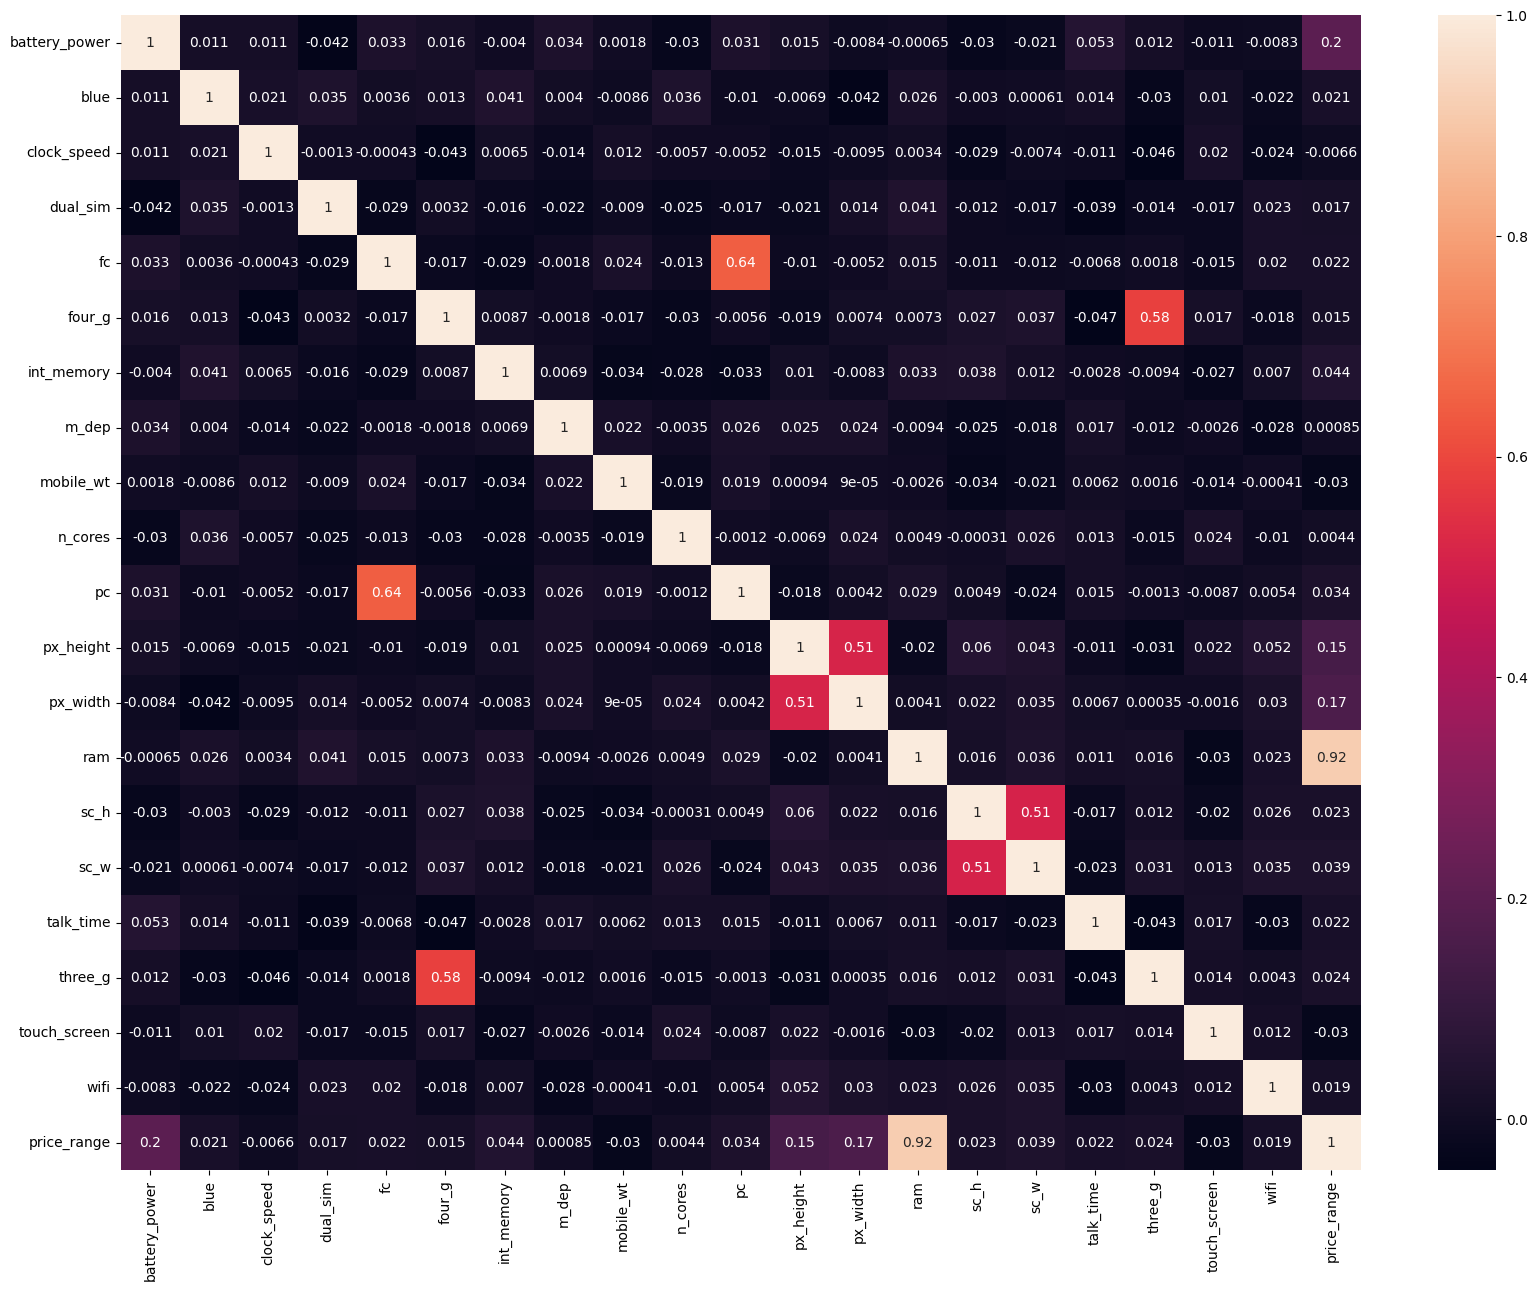

In [61]:
#Analysis on numerical data
plt.figure(figsize=(20,15))
sns.heatmap(data_train.corr(),annot=True)
plt.show()

ram is highly correlated with price range followed by battery power,pixel height and width, while m_dep, clock_speed and n_cores seems to be least correlaed with price_range.

<Axes: xlabel='price_range', ylabel='ram'>

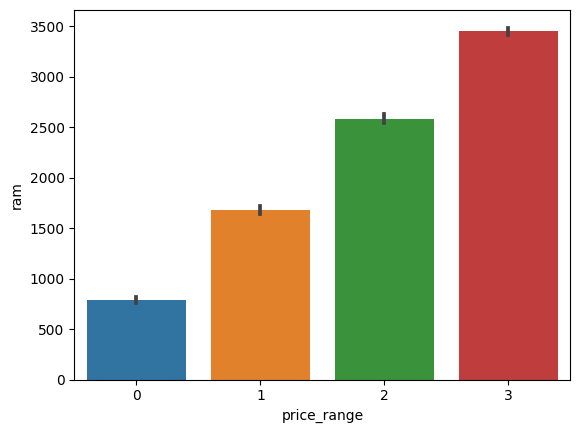

In [62]:
#Bivariate Analysis on features
plt.figure()
sns.barplot(y='ram', x="price_range", data=data_train)

<Axes: xlabel='price_range', ylabel='int_memory'>

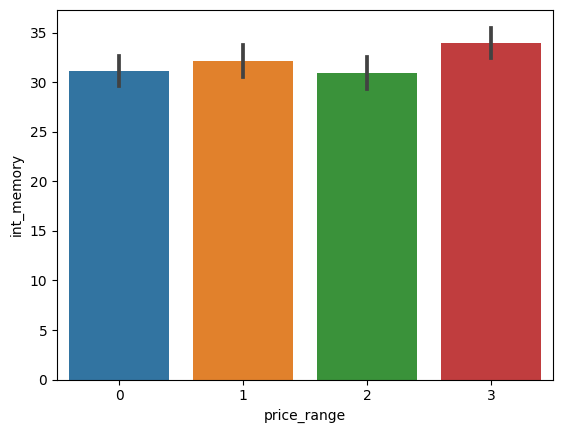

In [63]:
plt.figure()
sns.barplot(y="int_memory", x="price_range", data=data_train)

<Axes: xlabel='price_range', ylabel='battery_power'>

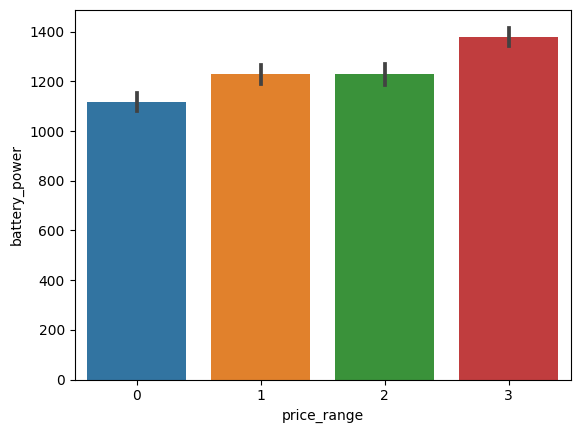

In [64]:
plt.figure()
sns.barplot(y="battery_power", x="price_range", data=data_train)

<Axes: xlabel='price_range', ylabel='touch_screen'>

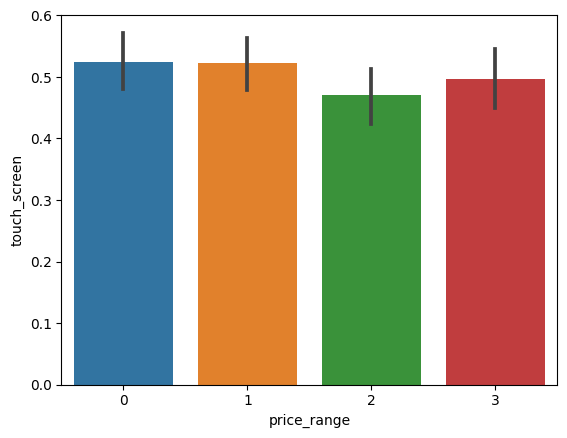

In [65]:
plt.figure()
sns.barplot(y="touch_screen", x="price_range", data=data_train)

<Axes: xlabel='price_range', ylabel='px_width'>

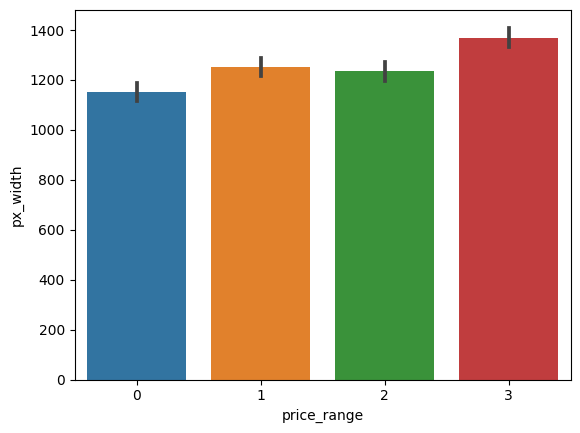

In [66]:
plt.figure()
sns.barplot(y="px_width", x="price_range", data=data_train)

**OUTLIER** **DETECTION**

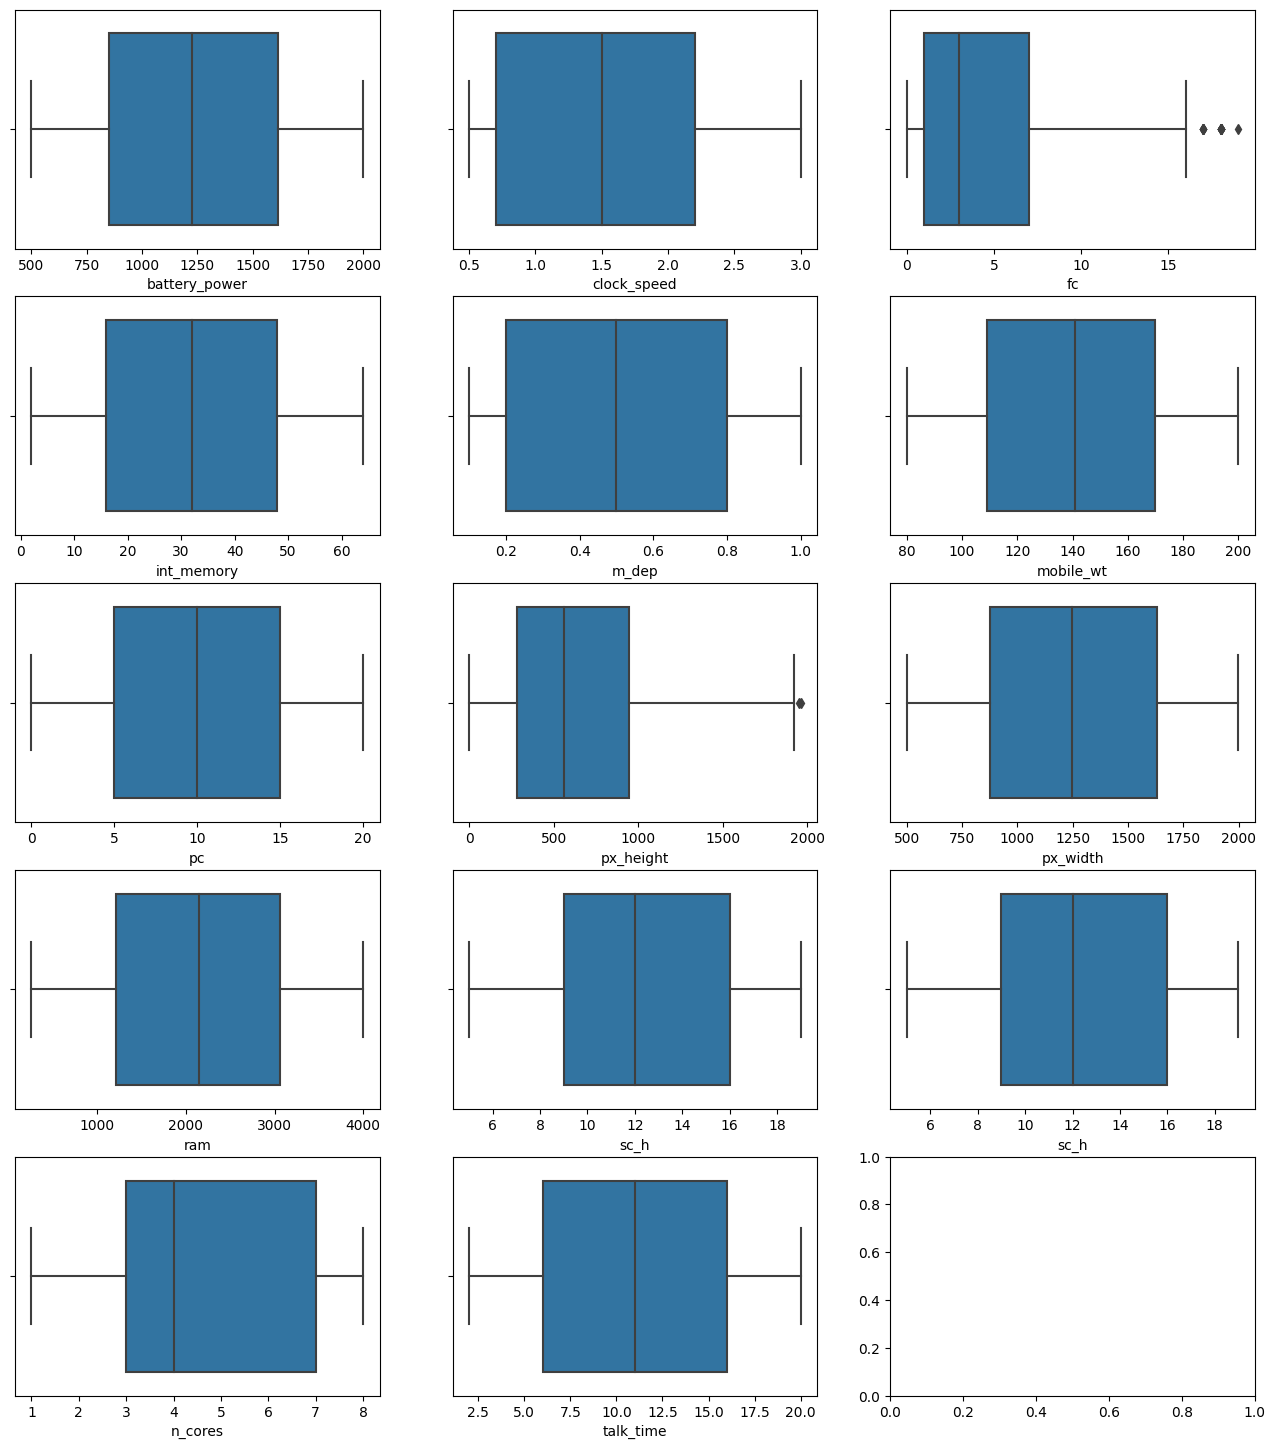

In [67]:
fig,axes=plt.subplots(5,3,figsize=(16,18))

sns.boxplot(x=data_train['battery_power'],ax=axes[0,0])

sns.boxplot(x=data_train['clock_speed'],ax=axes[0,1])

sns.boxplot(x=data_train['fc'],ax=axes[0,2])

sns.boxplot(x=data_train['int_memory'],ax=axes[1,0])

sns.boxplot(x=data_train['m_dep'],ax=axes[1,1])

sns.boxplot(x=data_train['mobile_wt'],ax=axes[1,2])

sns.boxplot(x=data_train['pc'],ax=axes[2,0])

sns.boxplot(x=data_train['px_height'],ax=axes[2,1])

sns.boxplot(x=data_train['px_width'],ax=axes[2,2])

sns.boxplot(x=data_train['ram'],ax=axes[3,0])

sns.boxplot(x=data_train['sc_h'],ax=axes[3,1])

sns.boxplot(x=data_train['sc_h'],ax=axes[3,2])

sns.boxplot(x=data_train['n_cores'],ax=axes[4,0])

sns.boxplot(x=data_train['talk_time'],ax=axes[4,1])

plt.show()


**Classify** **the** **dataset** **into** **software** **and** **hardware**

In [68]:
data1=data_train.loc[:,['battery_power', 'blue', 'four_g', 'mobile_wt', 'n_cores', 'px_height', 'px_width', 'price_range', 'talk_time', 'three_g', 'wifi', 'clock_speed']]
data1

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,wifi,clock_speed
0,842,0,0,188,2,20,756,1,19,0,1,2.2
1,1021,1,1,136,3,905,1988,2,7,1,0,0.5
2,563,1,1,145,5,1263,1716,2,9,1,0,0.5
3,615,1,0,131,6,1216,1786,2,11,1,0,2.5
4,1821,1,1,141,2,1208,1212,1,15,1,0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,6,1222,1890,0,19,1,0,0.5
1996,1965,1,0,187,4,915,1965,2,16,1,1,2.6
1997,1911,0,1,108,8,868,1632,3,5,1,0,0.9
1998,1512,0,1,145,5,336,670,0,19,1,1,0.9


In [69]:
data2=data_train.loc[:,['dual_sim','fc','m_dep','int_memory','pc','ram','sc_h','sc_w','touch_screen']]
data2

,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,0,1,0.6,7,2,2549,9,7,0
1,1,0,0.7,53,6,2631,17,3,1
2,1,2,0.9,41,6,2603,11,2,1
3,0,0,0.8,10,9,2769,16,8,0
4,0,13,0.6,44,14,1411,8,2,1
...,...,...,...,...,...,...,...,...,...
1995,1,0,0.8,2,14,668,13,4,1
1996,1,0,0.2,39,3,2032,11,10,1
1997,1,1,0.7,36,3,3057,9,1,1
1998,0,4,0.1,46,5,869,18,10,1


In [70]:
#merging datasets
data3=pd.concat([data1, data2], axis=1)
data3

,battery_power,blue,four_g,mobile_wt,n_cores,px_height,px_width,price_range,talk_time,three_g,...,clock_speed,dual_sim,fc,m_dep,int_memory,pc,ram,sc_h,sc_w,touch_screen
0,842,0,0,188,2,20,756,1,19,0,...,2.2,0,1,0.6,7,2,2549,9,7,0
1,1021,1,1,136,3,905,1988,2,7,1,...,0.5,1,0,0.7,53,6,2631,17,3,1
2,563,1,1,145,5,1263,1716,2,9,1,...,0.5,1,2,0.9,41,6,2603,11,2,1
3,615,1,0,131,6,1216,1786,2,11,1,...,2.5,0,0,0.8,10,9,2769,16,8,0
4,1821,1,1,141,2,1208,1212,1,15,1,...,1.2,0,13,0.6,44,14,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,106,6,1222,1890,0,19,1,...,0.5,1,0,0.8,2,14,668,13,4,1
1996,1965,1,0,187,4,915,1965,2,16,1,...,2.6,1,0,0.2,39,3,2032,11,10,1
1997,1911,0,1,108,8,868,1632,3,5,1,...,0.9,1,1,0.7,36,3,3057,9,1,1
1998,1512,0,1,145,5,336,670,0,19,1,...,0.9,0,4,0.1,46,5,869,18,10,1


In [71]:
x=data_train.drop(['price_range'],axis=1)
y=data_train['price_range']

In [72]:
#Feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x,y)
datascores = pd.DataFrame(fit.scores_)
datacolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([datacolumns,datascores],axis=1)
featureScores.columns = ['Features', 'Score']
print(featureScores.nlargest(12, 'Score'))

         Features          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


[0.06177166 0.01955298 0.03439091 0.0196738  0.03357991 0.0162595
 0.03514946 0.03407927 0.0375838  0.03373867 0.03481786 0.04730391
 0.05006893 0.3858844  0.03479732 0.0349096  0.03509117 0.01418226
 0.01732678 0.01983781]


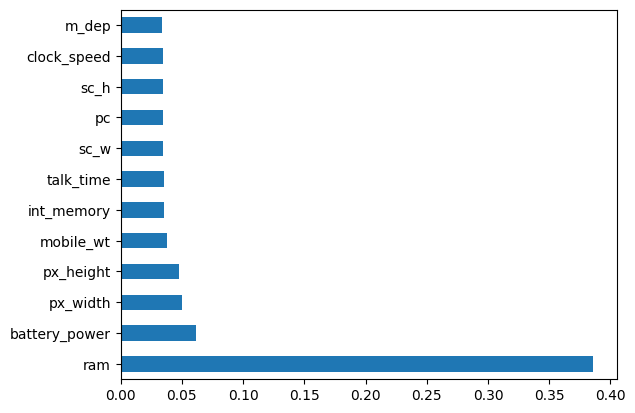

In [133]:
#Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #inbuilt class feature_importance of tree based classifiers

ranked_features = pd.Series(model.feature_importances_, index=x.columns)
ranked_features.nlargest(12).plot(kind= 'barh')
plt.show()

<Axes: >

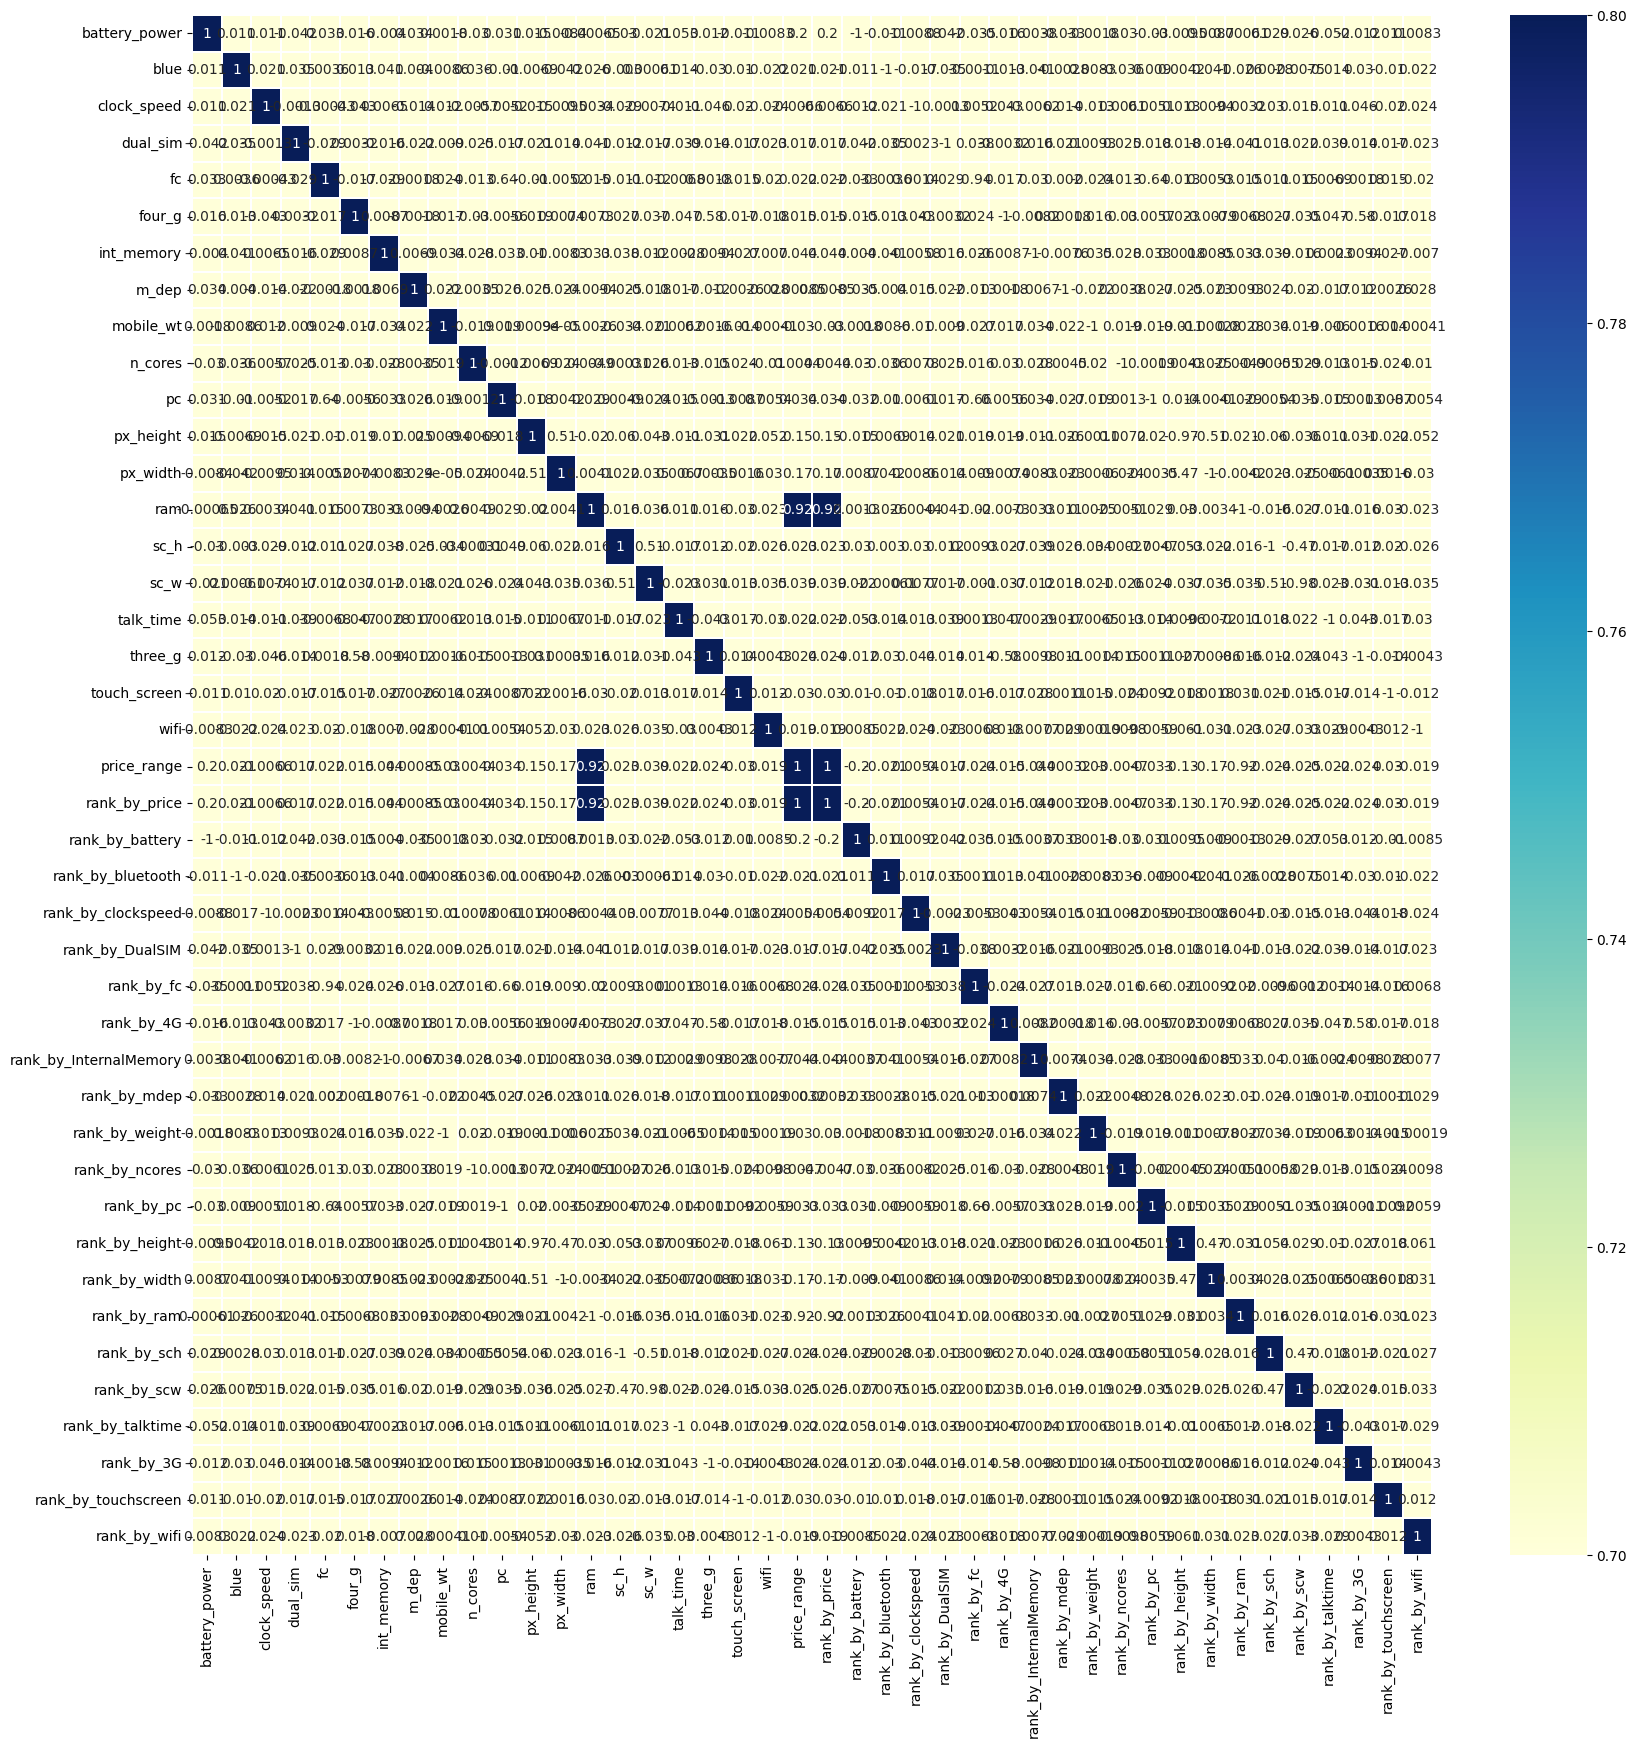

In [142]:
#Feature reduction
corrmatrix = data_train.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmatrix, vmin=0.7, vmax=0.8, annot=True, linewidths=0.2, cmap= 'YlGnBu')

In [73]:
## Feature Scaling

In [74]:
# Min-max scaling
data = data_train.drop(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'], axis=1)
x = data_train.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'], axis=1)
x

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [75]:
from sklearn.preprocessing import StandardScaler

x = data_train.drop("price_range", axis=1)
y = data_train["price_range"]

#scaler=StandardScaler()
#X=scaler.fit_transform(X)
#X=pd.DataFrame(X)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_train_scaled=scaler.fit_transform(x)
data_train_scaled=pd.DataFrame(data_train_scaled)
data_train_scaled.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


In [76]:
#x.describe()

**Splitting** **of** **dataset**

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [78]:
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (1500, 20)
x_test: (500, 20)
y_train: (1500,)
y_test: (500,)


**Modelling**

In [79]:
y=data_train["price_range"]
y.value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

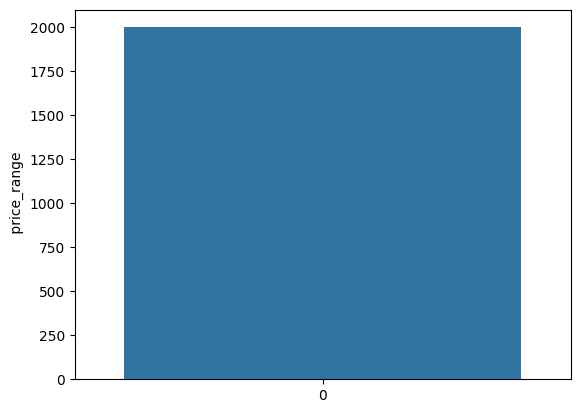

In [80]:
sns.countplot(y)
plt.ylabel(' price_range')
plt.show()

**Logistic** **Regression**

In [81]:
from sklearn.linear_model import LogisticRegression
logit_model= LogisticRegression()
logit_model.fit(x_train, y_train)


LogisticRegression()

In [82]:
y_pred = logit_model.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,recall_score, f1_score
print("Accuracy is:", accuracy_score(y_test,y_pred))
print("Result from Logistic Regression")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.65
Result from Logistic Regression


,precision,recall,f1-score,support
0,0.838710,0.859504,0.848980,121.000000
1,0.572727,0.543103,0.557522,116.000000
2,0.464000,0.467742,0.465863,124.000000
3,0.709220,0.719424,0.714286,139.000000
accuracy,0.650000,0.650000,0.650000,0.650000
macro avg,0.646164,0.647443,0.646663,500.000000
weighted avg,0.648076,0.650000,0.648904,500.000000


In [84]:
confusion_matrix(y_test,y_pred)

array([[104,  18,   2,   0],
       [ 17,  63,  25,   5],
       [  0,  33,  58,  34],
       [  0,   2,  39, 100]])

**Decision** **Tree** **Classifier**

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print("Accuracy is:", accuracy_score(y_test,y_pred))
print("Results from Decision Tree")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")


Accuracy is: 0.864
Results from Decision Tree


,precision,recall,f1-score,support
0,0.895161,0.925000,0.909836,120.000000
1,0.836364,0.786325,0.810573,117.000000
2,0.816000,0.816000,0.816000,125.000000
3,0.900709,0.920290,0.910394,138.000000
accuracy,0.864000,0.864000,0.864000,0.864000
macro avg,0.862059,0.861904,0.861701,500.000000
weighted avg,0.863144,0.864000,0.863303,500.000000


In [86]:
confusion_matrix(y_test,y_pred)

array([[111,  13,   0,   0],
       [  9,  92,   9,   0],
       [  0,  12, 102,  11],
       [  0,   0,  14, 127]])

**Random** **Forest** **Classifier**

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [130]:
y_pred = rf_model.predict(x_test)
print("Accuracy is:", accuracy_score(y_test,y_pred))
print("Results from Random Forest classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.88
Results from Random Forest classifier


,precision,recall,f1-score,support
0,0.975806,0.945312,0.960317,128.000000
1,0.818182,0.810811,0.814480,111.000000
2,0.792000,0.804878,0.798387,123.000000
3,0.921986,0.942029,0.931900,138.000000
accuracy,0.880000,0.880000,0.880000,0.880000
macro avg,0.876994,0.875758,0.876271,500.000000
weighted avg,0.880743,0.880000,0.880263,500.000000


In [131]:
confusion_matrix(y_test,y_pred)

array([[121,   3,   0,   0],
       [  7,  90,  13,   0],
       [  0,  18,  99,   8],
       [  0,   0,  11, 130]])

**K**-**NN**

In [96]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)

[0.924, 0.916, 0.924, 0.938, 0.946, 0.944, 0.942, 0.946, 0.942, 0.95, 0.946, 0.948]


Text(0, 0.5, 'Accuracy')

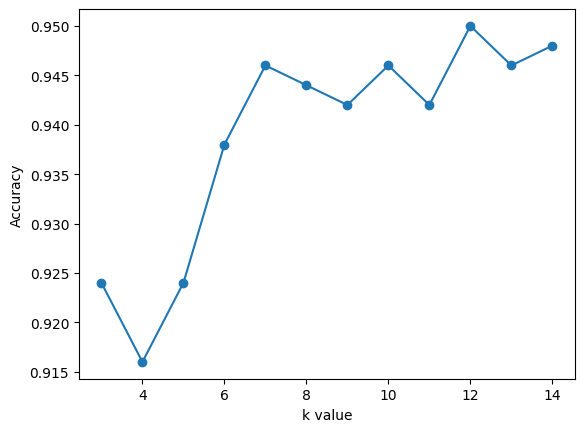

In [97]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [98]:
classifier = KNeighborsClassifier(n_neighbors=14, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy score is:', accuracy_score(y_test,y_pred))
print('Results from k-nn')
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap='PuBuGn')

accuracy score is: 0.948
Results from k-nn


,precision,recall,f1-score,support
0,0.991935,0.953488,0.972332,129.000000
1,0.936364,0.953704,0.944954,108.000000
2,0.936000,0.914062,0.924901,128.000000
3,0.929078,0.970370,0.949275,135.000000
accuracy,0.948000,0.948000,0.948000,0.948000
macro avg,0.948344,0.947906,0.947866,500.000000
weighted avg,0.948641,0.948000,0.948051,500.000000


In [99]:
confusion_matrix(y_test,y_pred)

array([[123,   1,   0,   0],
       [  6, 103,   1,   0],
       [  0,   4, 117,   4],
       [  0,   0,  10, 131]])

**Gradient** **Boost** **Classifier**

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)
print('Accuracy score is:', accuracy_score(y_test,y_pred))
print("Results from Gradient boosting classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")



Accuracy score is: 0.922
Results from Gradient boosting classifier


,precision,recall,f1-score,support
0,0.975806,0.975806,0.975806,124.000000
1,0.909091,0.900901,0.904977,111.000000
2,0.872000,0.865079,0.868526,126.000000
3,0.929078,0.942446,0.935714,139.000000
accuracy,0.922000,0.922000,0.922000,0.922000
macro avg,0.921494,0.921058,0.921256,500.000000
weighted avg,0.921846,0.922000,0.921902,500.000000


In [102]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[121   3   0   0]
 [  3 100   7   0]
 [  0   8 109   8]
 [  0   0  10 131]]


**XGBoost** **Classifier**

In [103]:
from xgboost.sklearn import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Results from XG Boost classifier")
result = classification_report(y_pred,y_test, output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is:  0.918
Results from XG Boost classifier


,precision,recall,f1-score,support
0,0.983871,0.953125,0.968254,128.000000
1,0.890909,0.890909,0.890909,110.000000
2,0.840000,0.889831,0.864198,118.000000
3,0.950355,0.930556,0.940351,144.000000
accuracy,0.918000,0.918000,0.918000,0.918000
macro avg,0.916284,0.916105,0.915928,500.000000
weighted avg,0.919813,0.918000,0.918645,500.000000


In [104]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[122   2   0   0]
 [  6  98   6   0]
 [  0  10 105  10]
 [  0   0   7 134]]


**Choosing** **Best** **Model**

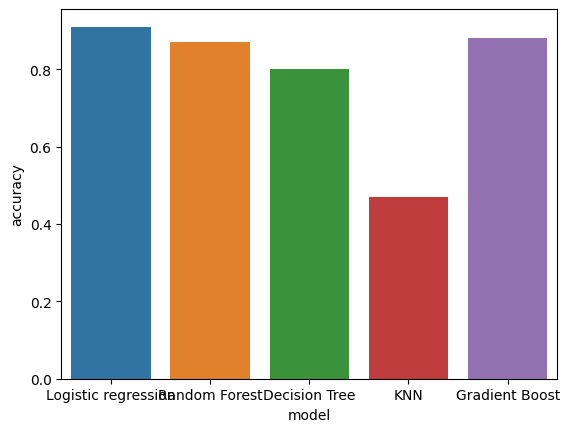

In [108]:
classifiers =["Logistic regression", "Random Forest", "Decision Tree", "KNN", "Gradient Boost"]
accuracy = [0.91,0.87,0.80,0.47,0.88]
f1_score = [0.96,0.89,0.86,0.94,0.91,]
df_af=pd.DataFrame({'model':classifiers,"accuracy":accuracy,"f1-score":f1_score})
sns.barplot(data=df_af, x="model", y="accuracy")
plt.show()

Logistic Regression is the Best Model

**Test** **Dataset** **to** **predict** **the** **results** **bold text**

In [109]:
data_test = pd.read_csv('MobileTest.csv', index_col='id')
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [112]:
data_test_scaled=scaler.fit_transform(data_test)
data_test_scaled

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [115]:
test_pred=logit_model.predict(data_test_scaled)

In [114]:
result=pd.DataFrame(test_pred)

In [116]:
print(result)

     0
0    0
1    0
2    0
3    3
4    3
..  ..
995  0
996  0
997  3
998  0
999  3

[1000 rows x 1 columns]


In [117]:
pd.DataFrame(result).to_csv('result.csv')

**Ranking Features of Smartphone**

In [118]:
#Ranking dataset according to price range

data_train["rank_by_price"]=data_train["price_range"].rank()
data1=data_train
data1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [120]:
data1["rank_by_price"]=data1["rank_by_price"].sort_values()
data1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [121]:
#sorting above dataset according to ranked_price_range
data1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


In [122]:
#ranking on all the features using rank()

RankedData = data1.rank()
RankedData.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5


In [124]:
#Ranking features separately to correct output
#To find features are good when values are high or low

r = data1
r["rank_by_price"]=r["price_range"].rank()
r["rank_by_battery"]=r["battery_power"].rank(ascending=False)
r["rank_by_bluetooth"]=r["blue"].rank(ascending=False)
r["rank_by_clockspeed"]=r["clock_speed"].rank(ascending=False)
r["rank_by_DualSIM"]=r["dual_sim"].rank(ascending=False)
r["rank_by_fc"]=r["fc"].rank(ascending=False)
r["rank_by_4G"]=r["four_g"].rank(ascending=False)
r["rank_by_InternalMemory"]=r["int_memory"].rank(ascending=False)
r["rank_by_mdep"]=r["m_dep"].rank(ascending=False)
r["rank_by_weight"]=r["mobile_wt"].rank(ascending=False)
r["rank_by_ncores"]=r["n_cores"].rank(ascending=False)
r["rank_by_pc"]=r["pc"].rank(ascending=False)
r["rank_by_height"]=r["px_height"].rank(ascending=False)
r["rank_by_width"]=r["px_width"].rank(ascending=False)
r["rank_by_ram"]=r["ram"].rank(ascending=False)
r["rank_by_sch"]=r["sc_h"].rank(ascending=False)
r["rank_by_scw"]=r["sc_w"].rank(ascending=False)
r["rank_by_talktime"]=r["talk_time"].rank(ascending=False)
r["rank_by_3G"]=r["three_g"].rank(ascending=False)
r["rank_by_touchscreen"]=r["touch_screen"].rank(ascending=False)
r["rank_by_wifi"]=r["wifi"].rank(ascending=False)
r.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [125]:
RankedData = r.iloc[:,21:]
RankedData

,rank_by_price,rank_by_battery,rank_by_bluetooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,217.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,1068.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,932.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,1155.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,995.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,1545.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,234.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,1514.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,932.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5
